#Importing csv file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving COVID-19_title.csv to COVID-19_title.csv


**Importing libraries**

In [ ]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
stop = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import string
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import csv
from csv import reader
tit = []
with open("COVID-19_title.csv", 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        # row variable is a list that represents a row in csv
        tit.append(row)

In [ ]:
print(len(tit))

242108


In [ ]:
val = []
for i in tit:
  val.append(i[0])

#Tokenizing

In [ ]:


tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
doc_set = val
# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    texts.append(tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]



#LDA model

Link: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#:~:text=In%20LDA%20models%2C%20each%20document,in%20a%20nicely%20formatted%20output

No. of topics = 4

passes = 100

In [ ]:

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=100)

**Word Cloud**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
print(val[:110])
clo = " ".join(val)

NameError: ignored

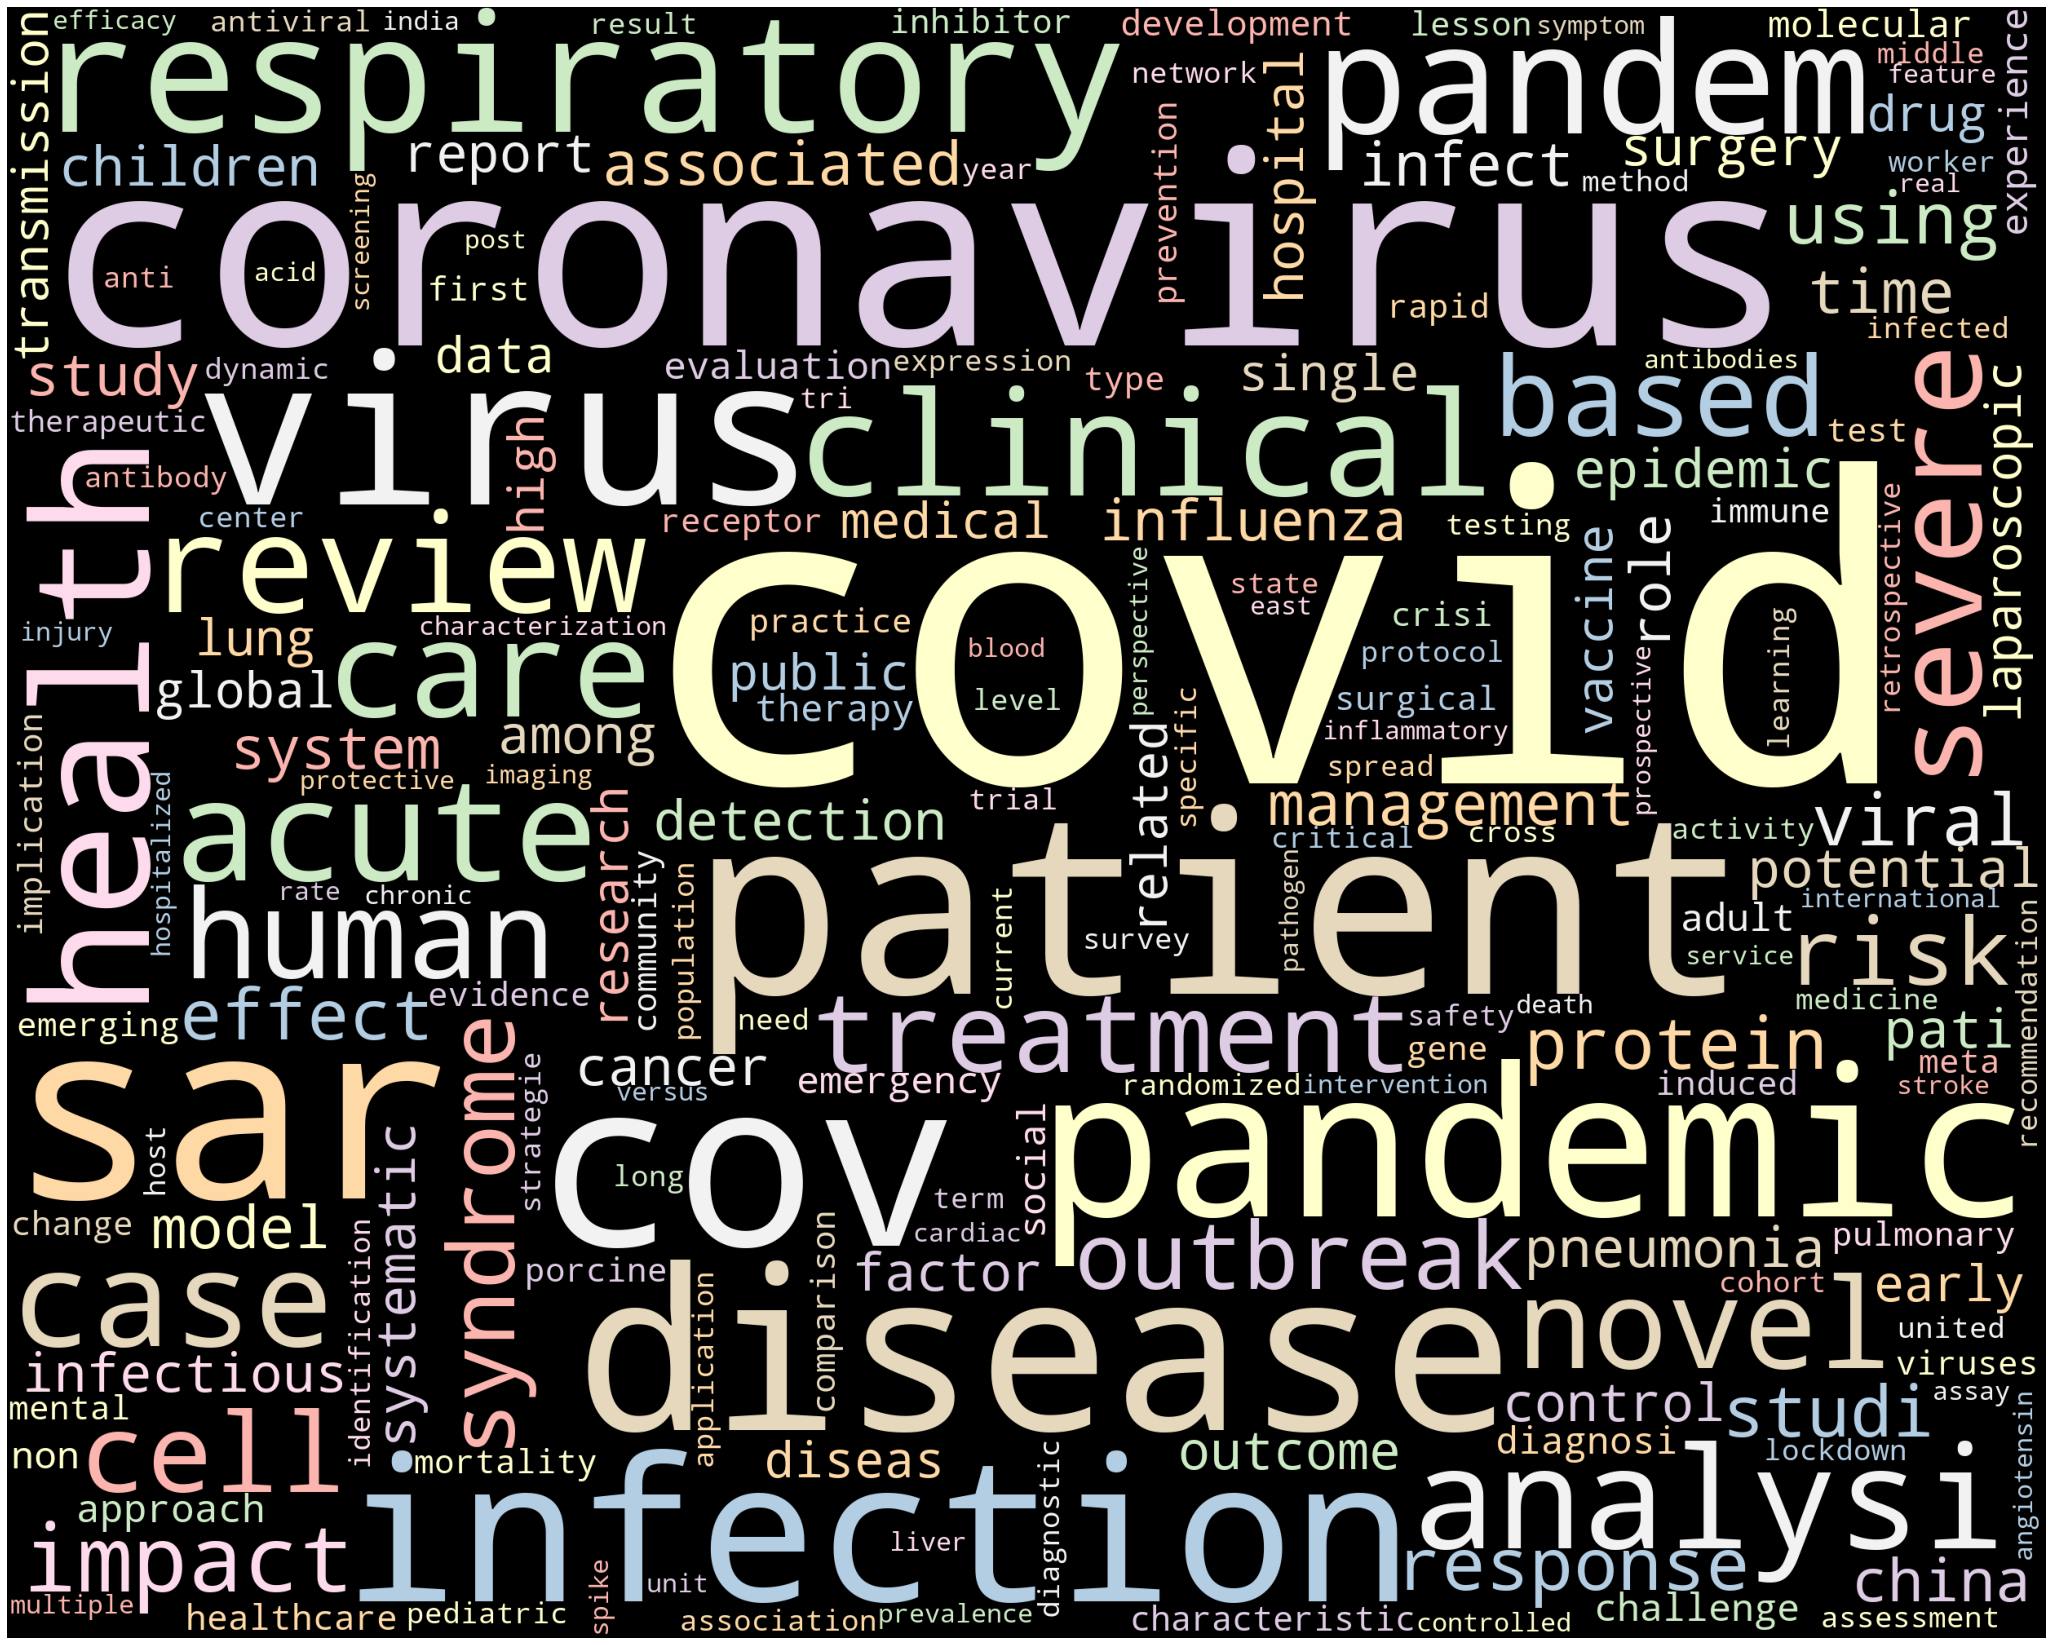

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 2500, height = 2000, random_state=5, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(clo)
# Plot
plot_cloud(wordcloud)

**Displaying all the words present in a topic**

In [ ]:
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.157*"covid" + 0.154*"19" + 0.026*"coronavirus" + 0.018*"pandem" + 0.017*"disease" + 0.015*"2019" + 0.015*"pandemic" + 0.013*"patients" + 0.007*"during" + 0.007*"novel"
Topic: 1 
Words: 0.050*"sars" + 0.044*"cov" + 0.041*"2" + 0.035*"respiratory" + 0.019*"acute" + 0.016*"patients" + 0.016*"syndrome" + 0.016*"severe" + 0.014*"infection" + 0.011*"clinical"
Topic: 2 
Words: 0.030*"virus" + 0.016*"coronavirus" + 0.012*"human" + 0.010*"protein" + 0.007*"viral" + 0.007*"cell" + 0.006*"infectious" + 0.005*"porcine" + 0.005*"based" + 0.005*"influenza"
Topic: 3 
Words: 0.020*"health" + 0.012*"care" + 0.012*"review" + 0.009*"pandemic" + 0.008*"china" + 0.007*"clinical" + 0.007*"impact" + 0.007*"among" + 0.006*"studi" + 0.006*"study"


**Dominant topic and its percentage contribution**

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

This way, you will know which document belongs predominantly to which topic.

In [ ]:
import pandas as pd
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,6), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  ...                                               Text
0            0  ...  [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...
1            1  ...  [(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), ...
2            2  ...  [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1), ...
3            3  ...      [(14, 1), (16, 1), (27, 1), (28, 1), (29, 1)]
4            4  ...  [(30, 1), (31, 1), (32, 1), (33, 1), (34, 1), ...
5            5  ...  [(37, 1), (38, 1), (39, 1), (40, 1), (41, 1), ...
6            6  ...  [(45, 1), (46, 1), (47, 1), (48, 1), (49, 1), ...
7            7  ...  [(52, 1), (53, 1), (54, 1), (55, 1), (56, 1), ...
8            8  ...  [(25, 1), (27, 1), (65, 1), (66, 1), (67, 1), ...
9            9  ...  [(70, 1), (71, 1), (72, 1), (73, 1), (74, 1), ...

[10 rows x 5 columns]

**Frequency Distribution of Word Counts in Documents**

When working with a large number of documents, you want to know how big the documents are as a whole and by topic. Let’s plot the document word counts distribution.

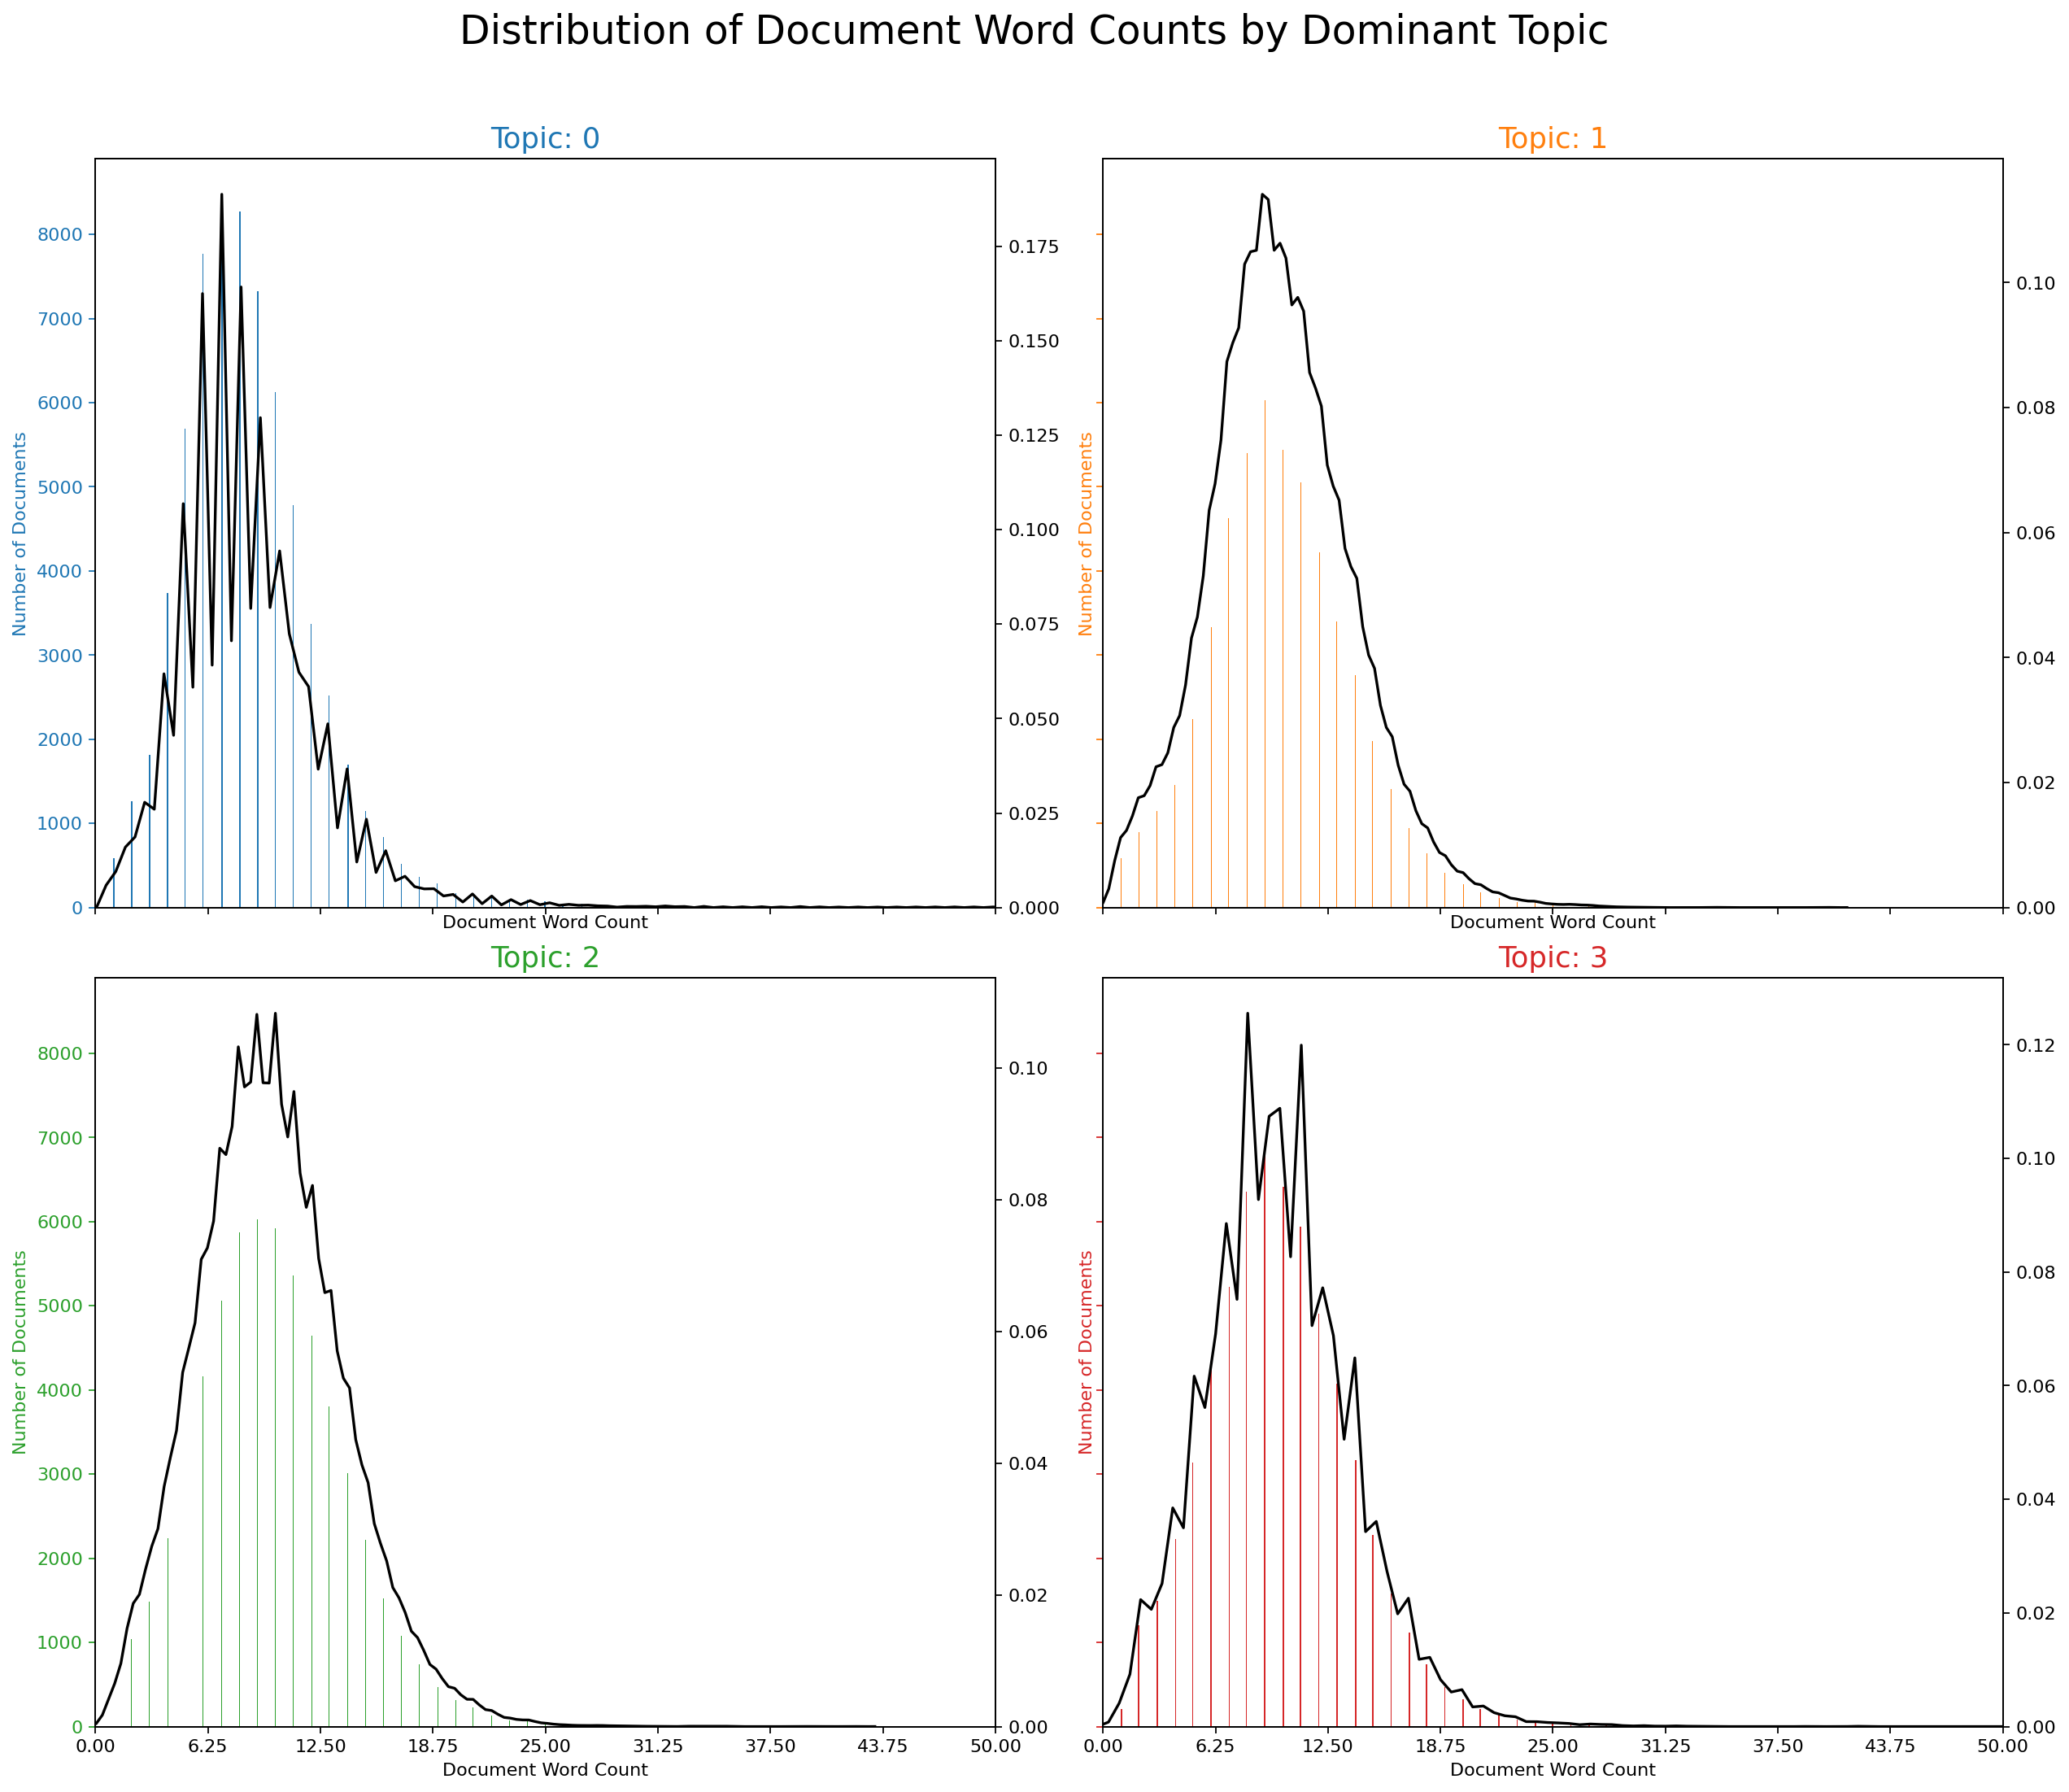

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 50), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,50,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

**Word Clouds of Top N Keywords in Each Topic**

A word cloud is with the size of the words proportional to the weight is a pleasant sight. The coloring of the topics I’ve taken here is followed in the subsequent plots as well.

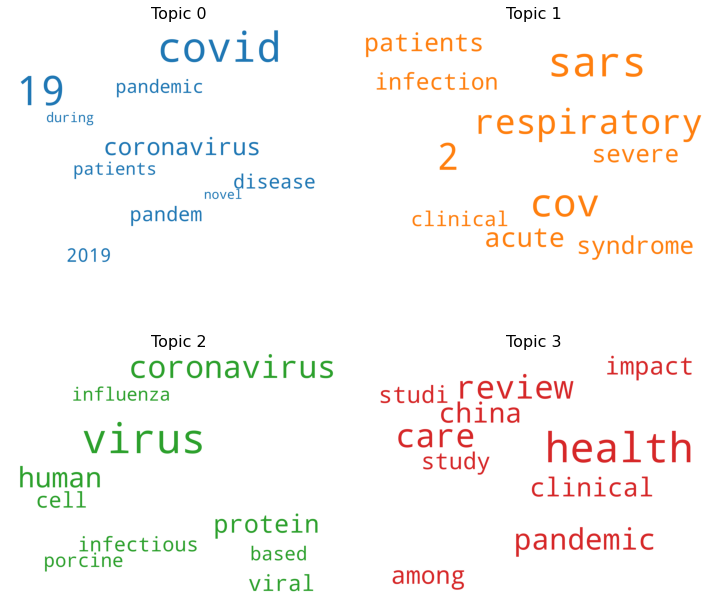

In [ ]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**Word Counts of Topic Keywords**

When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

You want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important. The chart I’ve drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

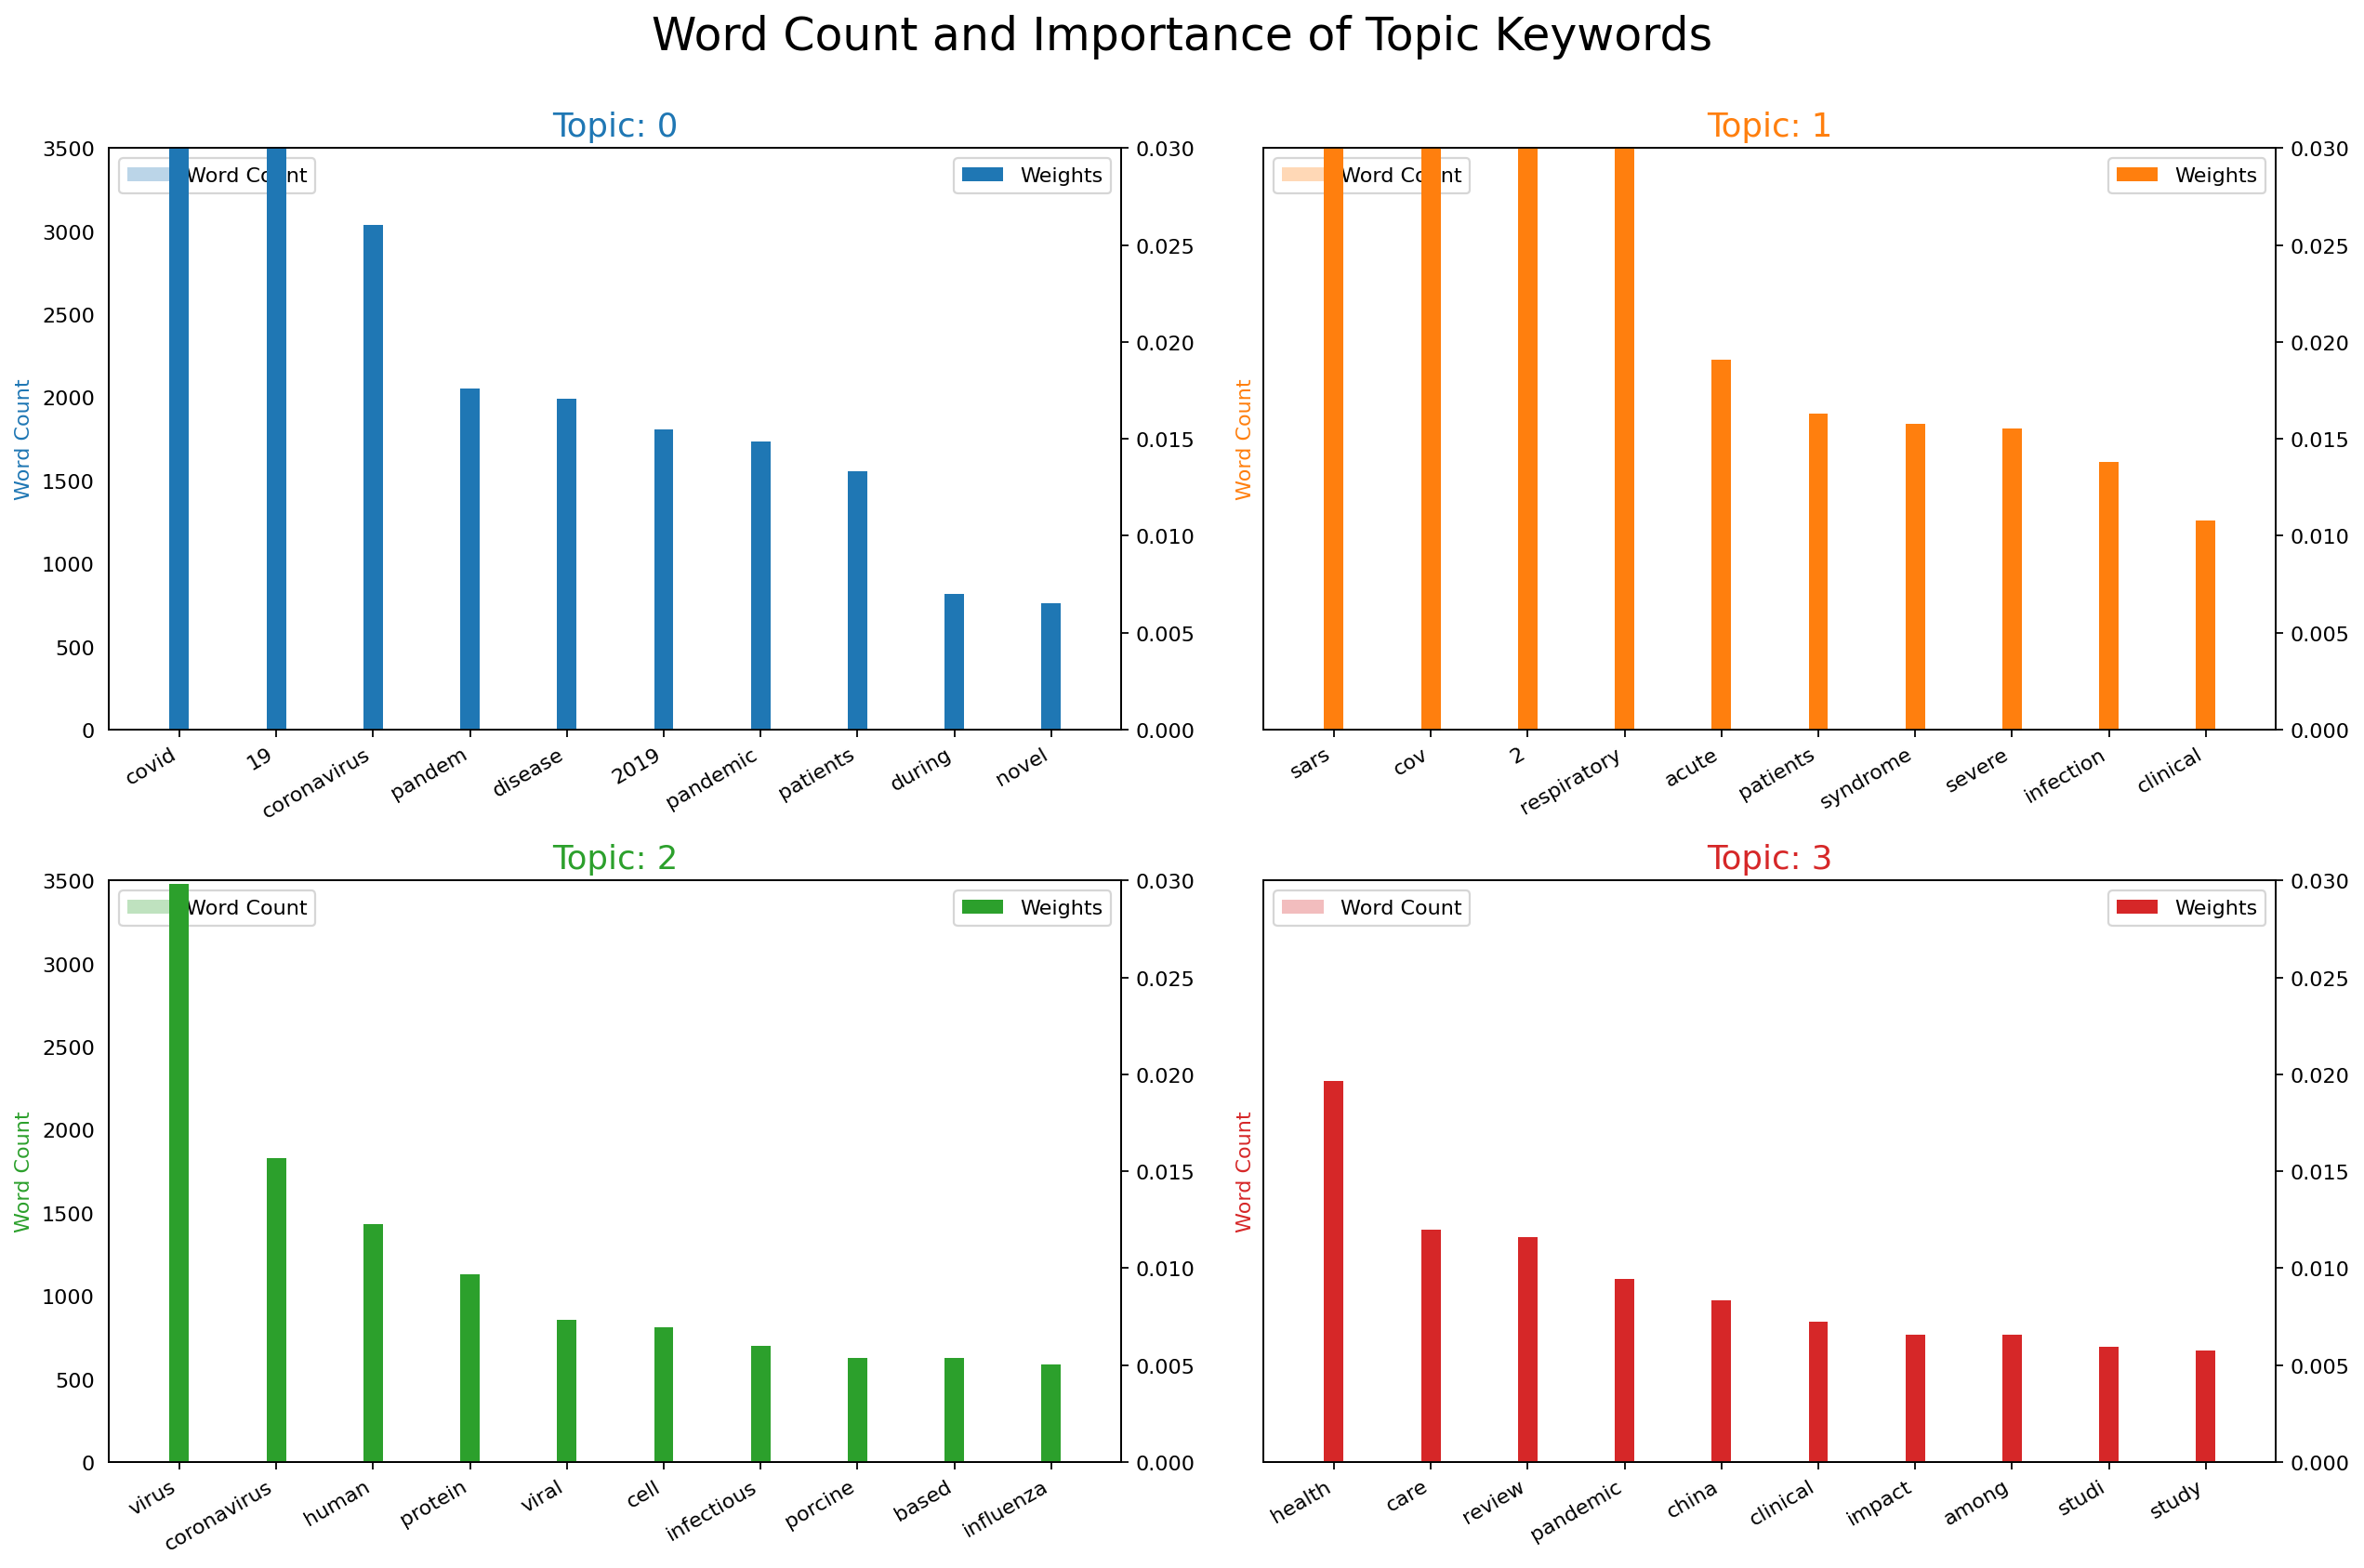

In [ ]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in corpus for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

Change in no. of topics

No. of topics=6

passes=100

In [ ]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=6, id2word = dictionary, passes=100)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
print(val[:110])
clo = " ".join(val)

['clinical features culture-proven mycoplasma pneumoniae infections king abdulaziz university hospital jeddah saudi arabia', 'nitric oxide pro-inflammatory mediator lung diseas', 'surfactant protein-d pulmonary host defens', 'role endothelin-1 lung diseas', 'gene expression epithelial cells response pneumovirus infect', 'sequence requirements strand transfer nidovirus discontinuous subgenomic synthesi', 'debate transfusing normal haemoglobin levels improve outcom', '21st international symposium intensive care emergency medicine brussels belgium 20-23 march 2001', 'heme oxygenase-1 carbon monoxide pulmonary medicin', 'technical description rods real-time public health surveillance system', 'conservation polyamine regulation translational frameshifting yeast mamm', 'heterogeneous nuclear ribonucleoprotein regulates synthesis cytoplasmic virus', 'method identify domain interacting protein', 'vaccinia virus infection disrupts microtubule organization centrosome funct', 'site origin 1918 in

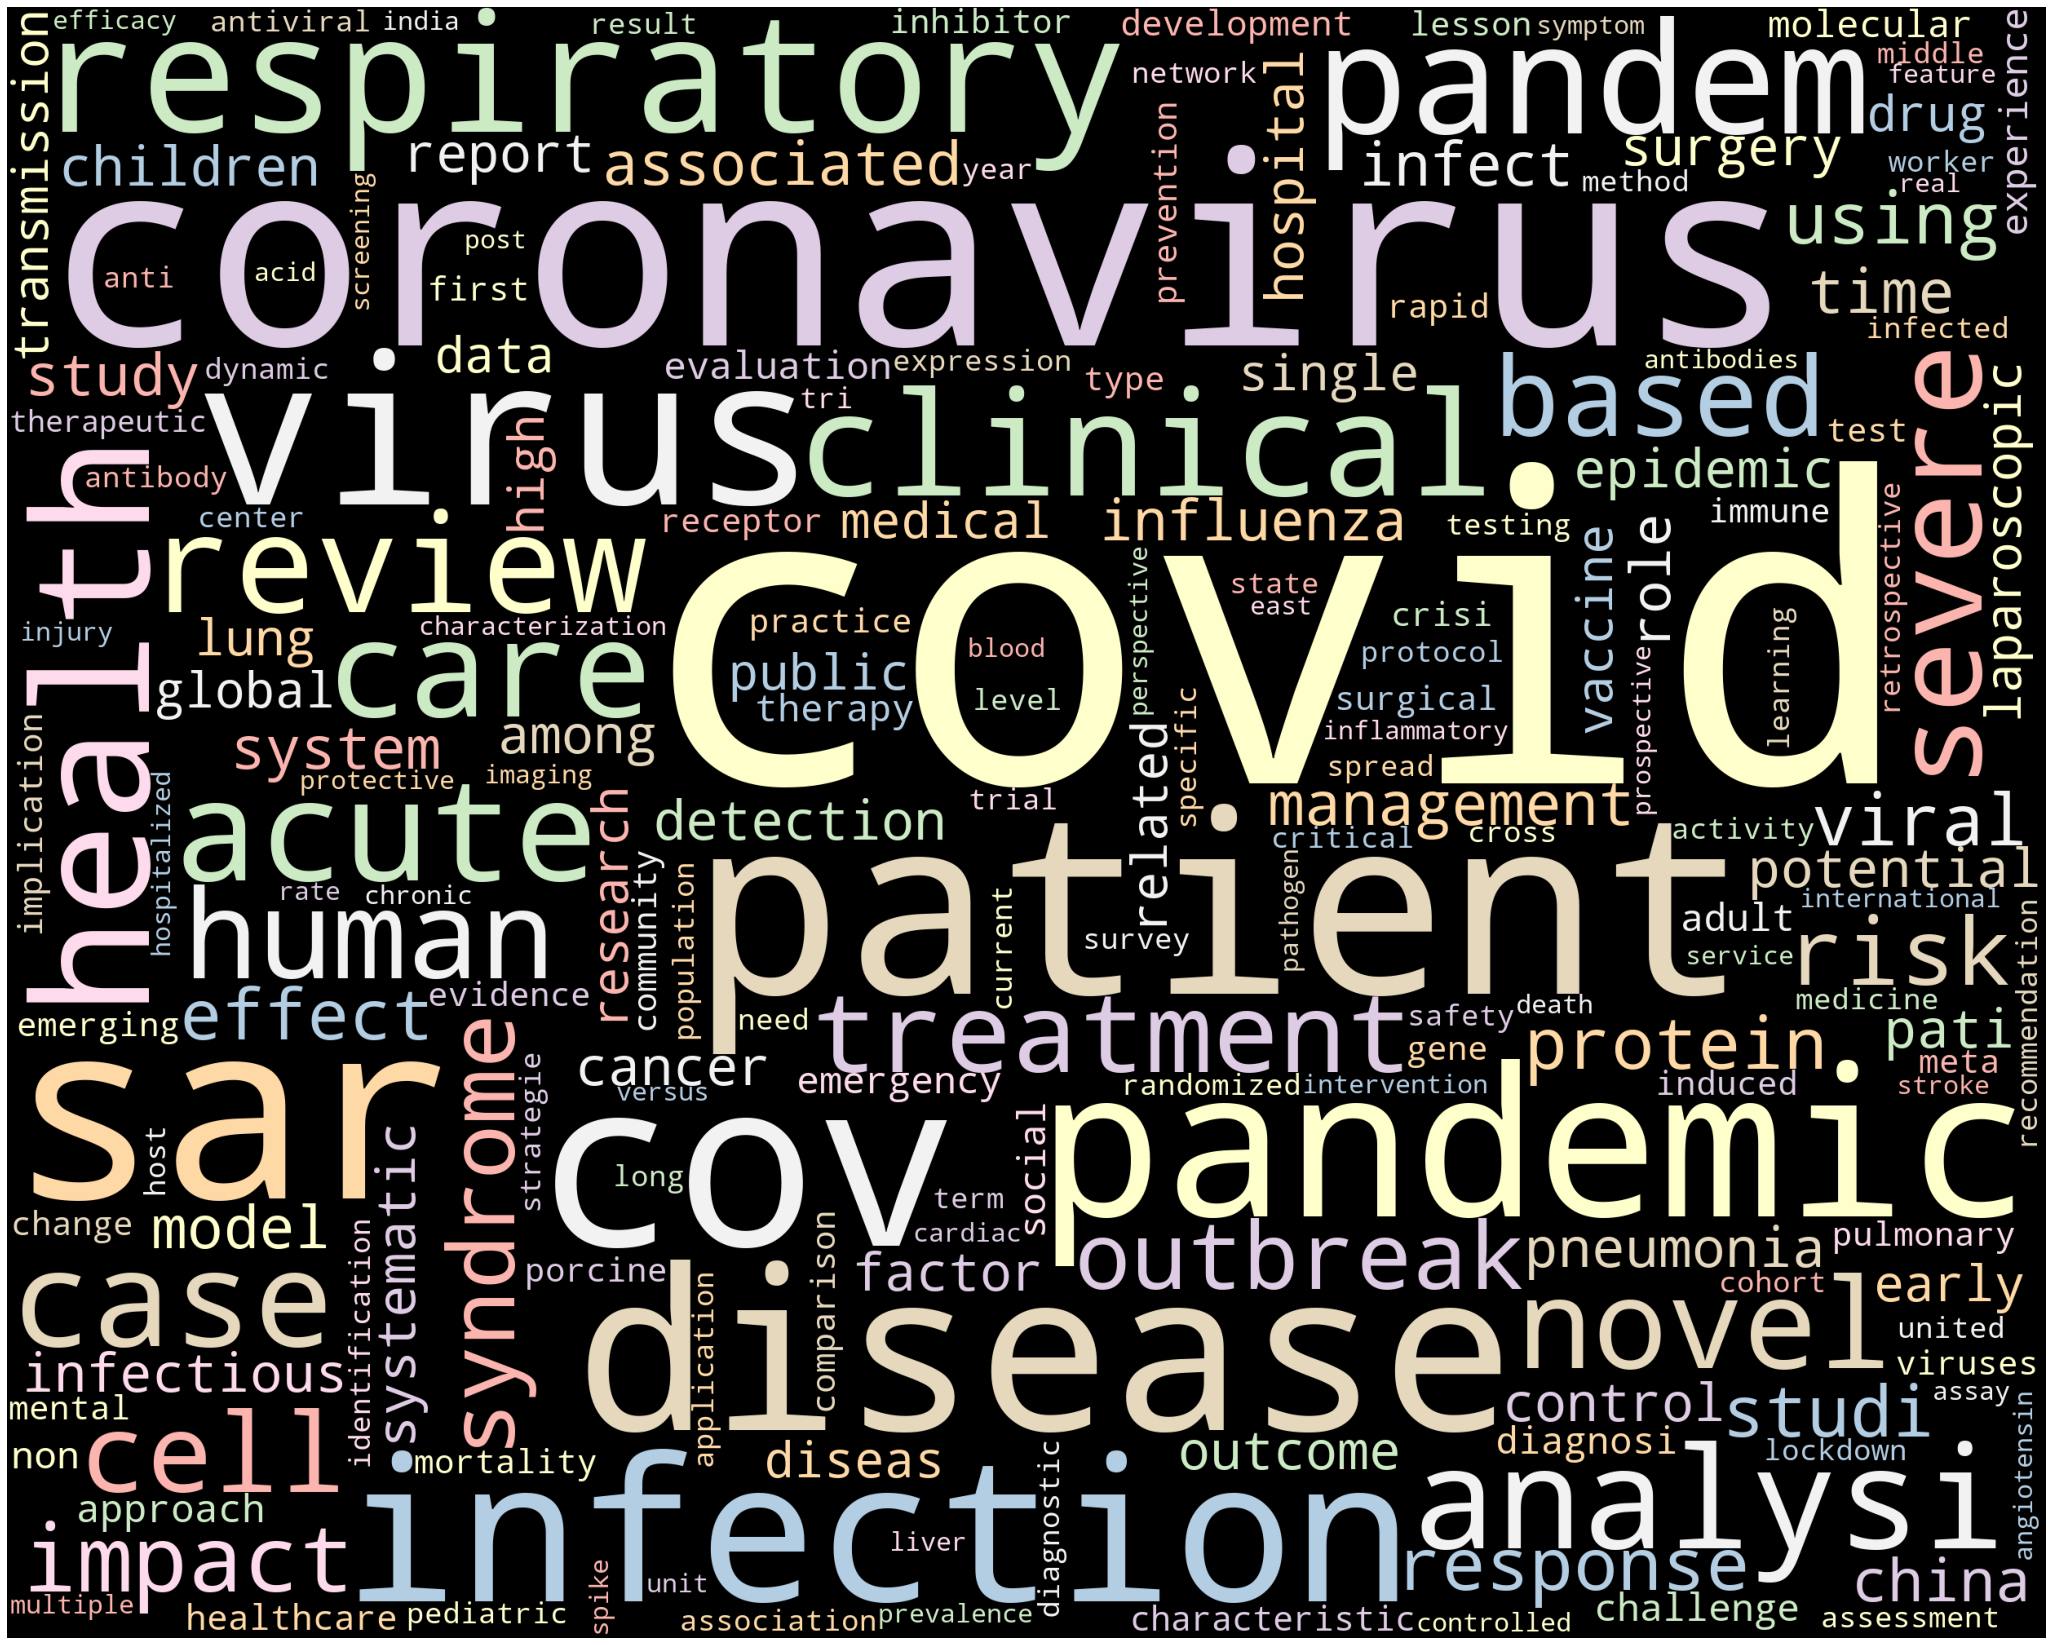

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 2500, height = 2000, random_state=5, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(clo)
# Plot
plot_cloud(wordcloud)

In [ ]:
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.014*"spike" + 0.014*"mers" + 0.010*"future" + 0.010*"surgical" + 0.009*"india" + 0.008*"society" + 0.008*"long" + 0.007*"letter" + 0.007*"term" + 0.006*"recent"
Topic: 1 
Words: 0.164*"covid" + 0.162*"19" + 0.045*"coronavirus" + 0.022*"disease" + 0.018*"patients" + 0.016*"2019" + 0.016*"pandemic" + 0.016*"pandem" + 0.013*"respiratory" + 0.012*"severe"
Topic: 2 
Words: 0.033*"virus" + 0.014*"human" + 0.012*"sars" + 0.011*"viral" + 0.011*"protein" + 0.010*"respiratory" + 0.009*"detection" + 0.008*"2" + 0.008*"cell" + 0.007*"infectious"
Topic: 3 
Words: 0.013*"emergency" + 0.009*"survey" + 0.007*"angiotensin" + 0.006*"italy" + 0.005*"symptoms" + 0.005*"corona" + 0.005*"medicine" + 0.005*"education" + 0.005*"current" + 0.005*"department"
Topic: 4 
Words: 0.031*"review" + 0.017*"patients" + 0.014*"case" + 0.013*"report" + 0.012*"systematic" + 0.010*"acute" + 0.009*"treatment" + 0.009*"clinical" + 0.009*"analysi" + 0.009*"pulmonary"
Topic: 5 
Words: 0.036*"cov" + 0.028*"sa

In [ ]:
import pandas as pd
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,6), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  ...                                               Text
0            0  ...  [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...
1            1  ...  [(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), ...
2            2  ...  [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1), ...
3            3  ...      [(14, 1), (16, 1), (27, 1), (28, 1), (29, 1)]
4            4  ...  [(30, 1), (31, 1), (32, 1), (33, 1), (34, 1), ...
5            5  ...  [(37, 1), (38, 1), (39, 1), (40, 1), (41, 1), ...
6            6  ...  [(45, 1), (46, 1), (47, 1), (48, 1), (49, 1), ...
7            7  ...  [(52, 1), (53, 1), (54, 1), (55, 1), (56, 1), ...
8            8  ...  [(25, 1), (27, 1), (65, 1), (66, 1), (67, 1), ...
9            9  ...  [(70, 1), (71, 1), (72, 1), (73, 1), (74, 1), ...

[10 rows x 5 columns]

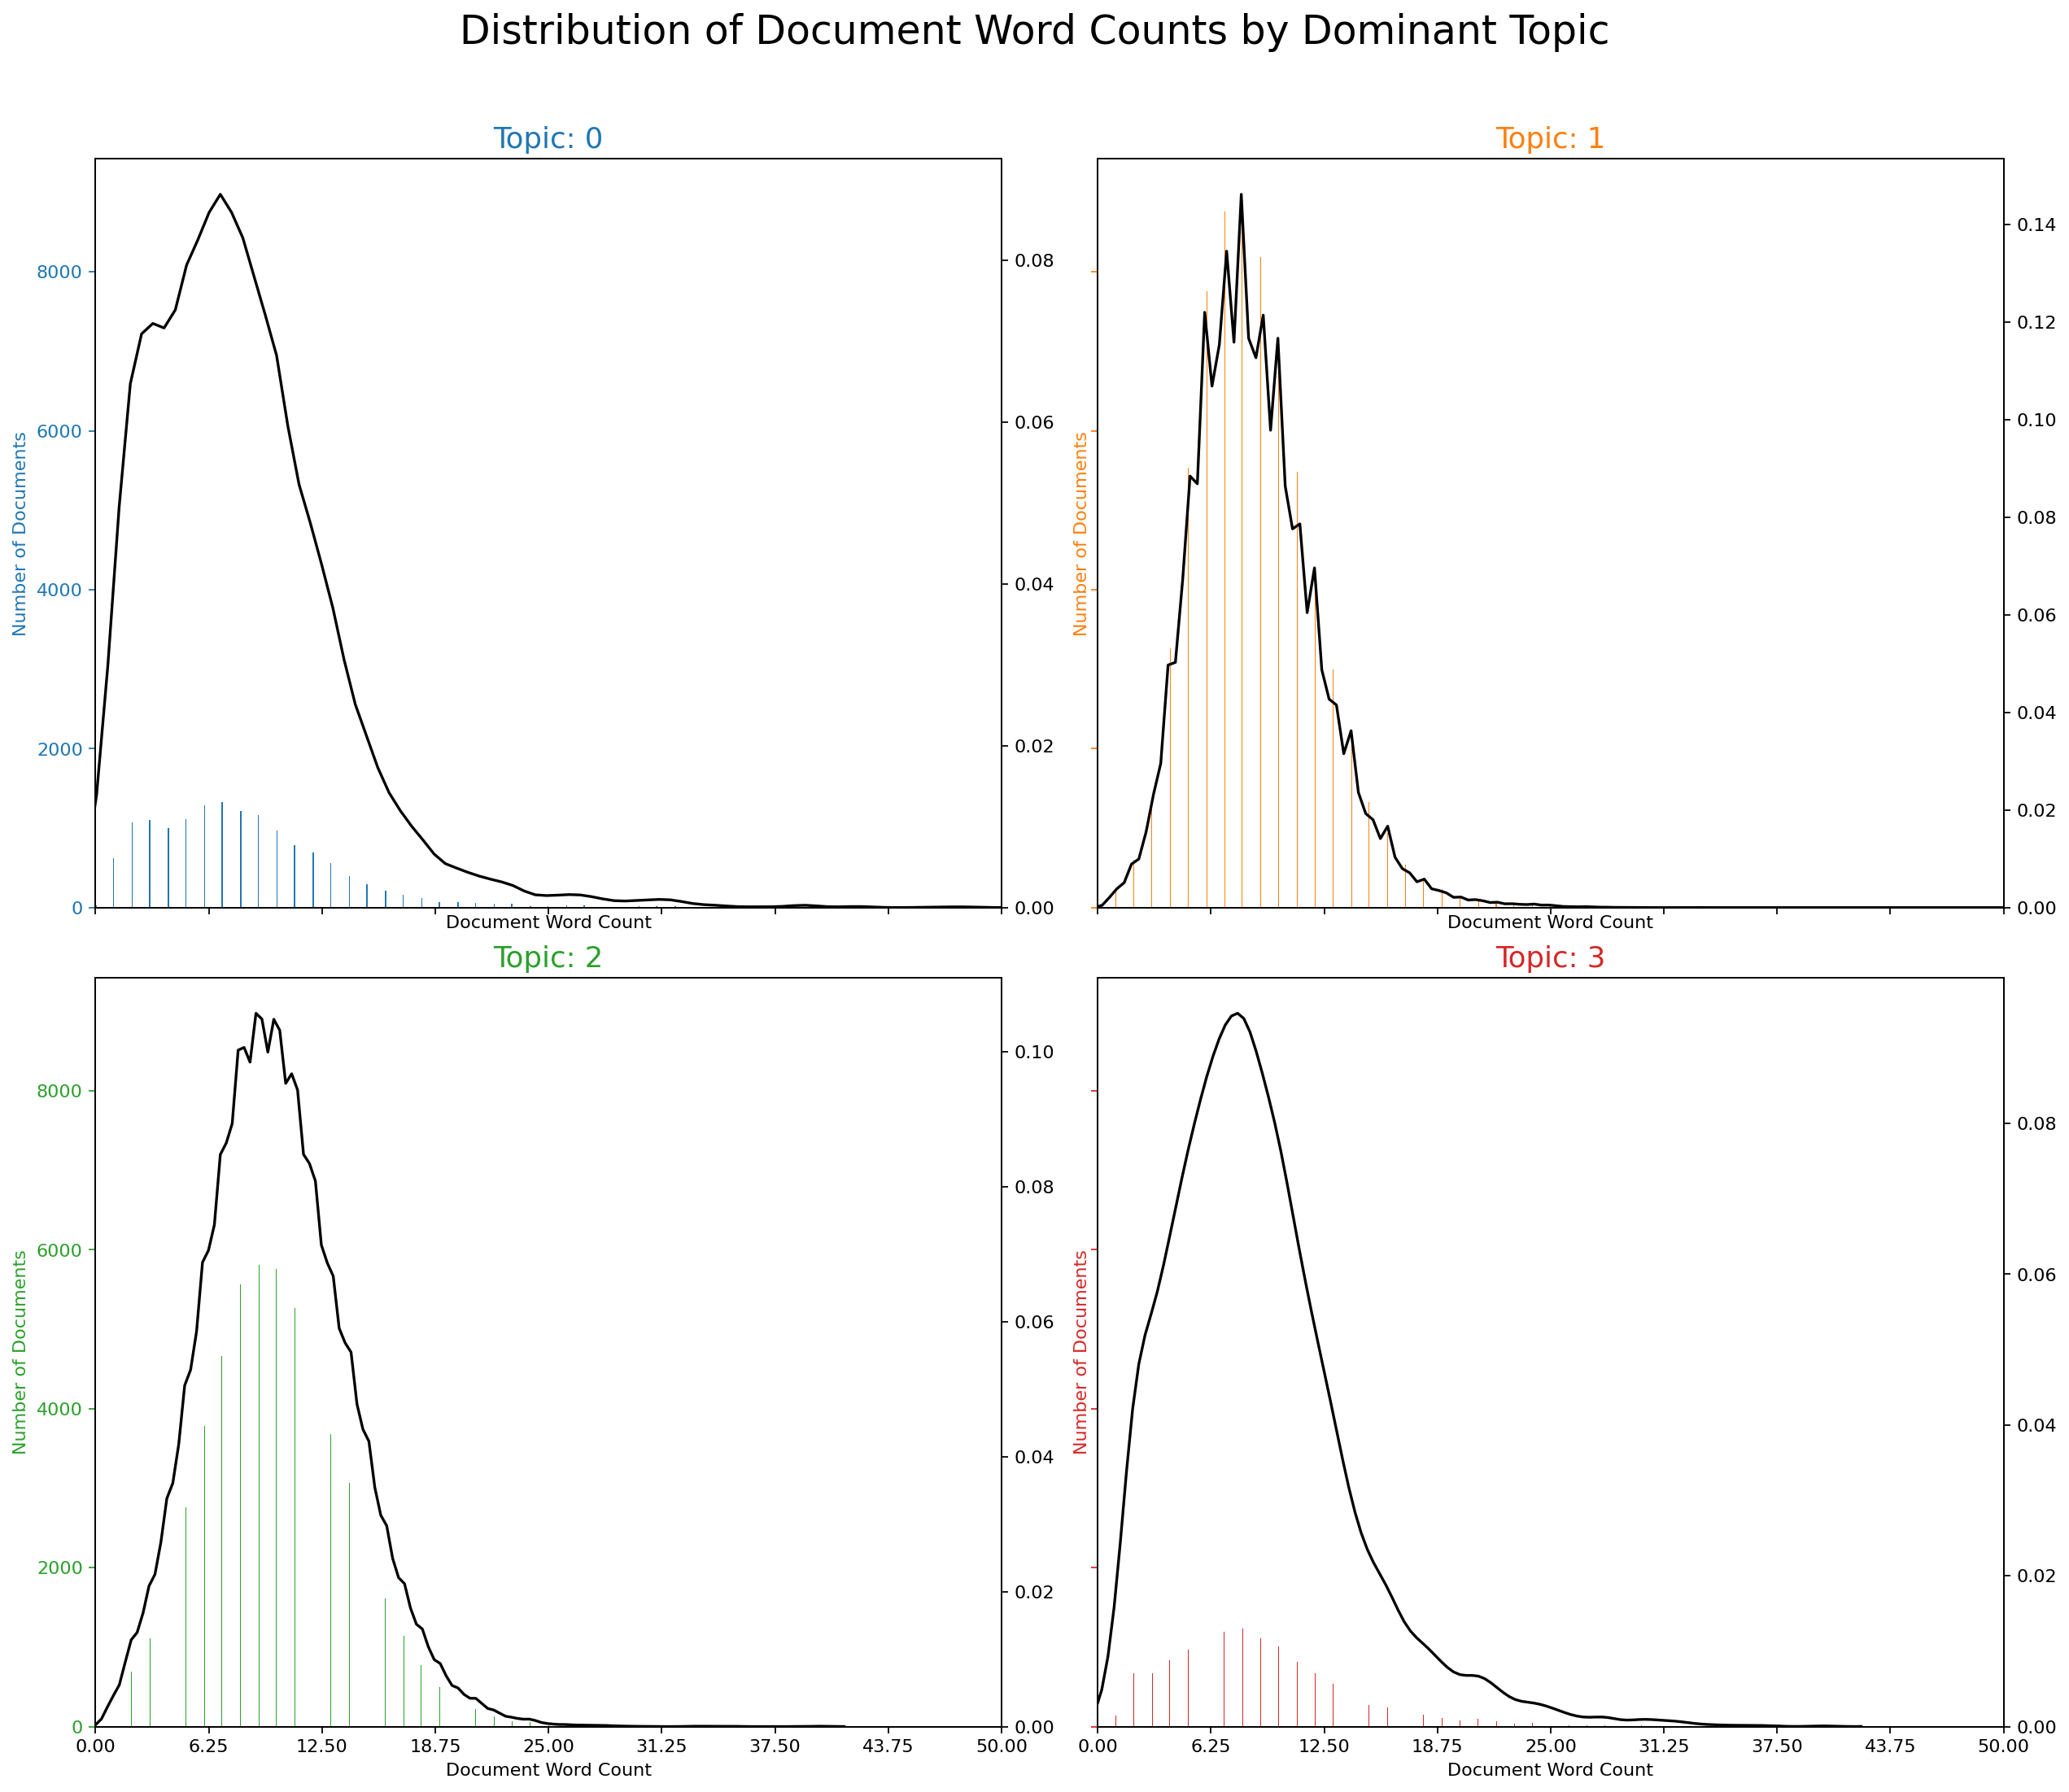

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 50), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,50,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

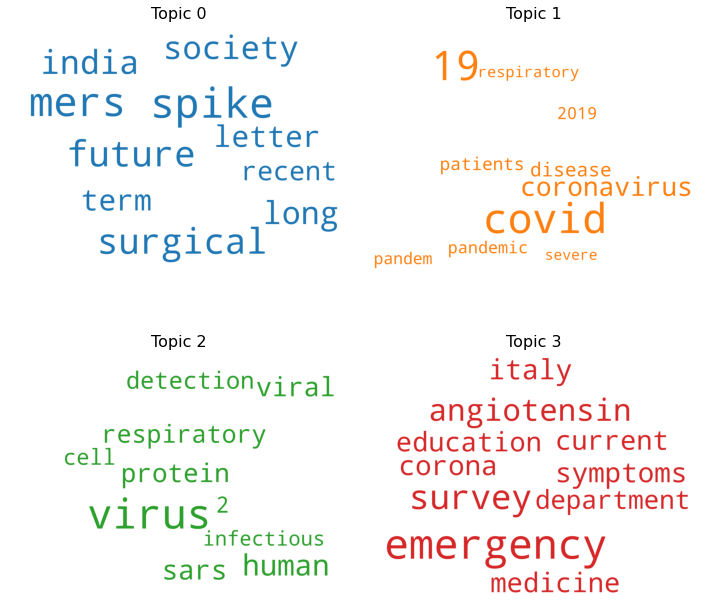

In [ ]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

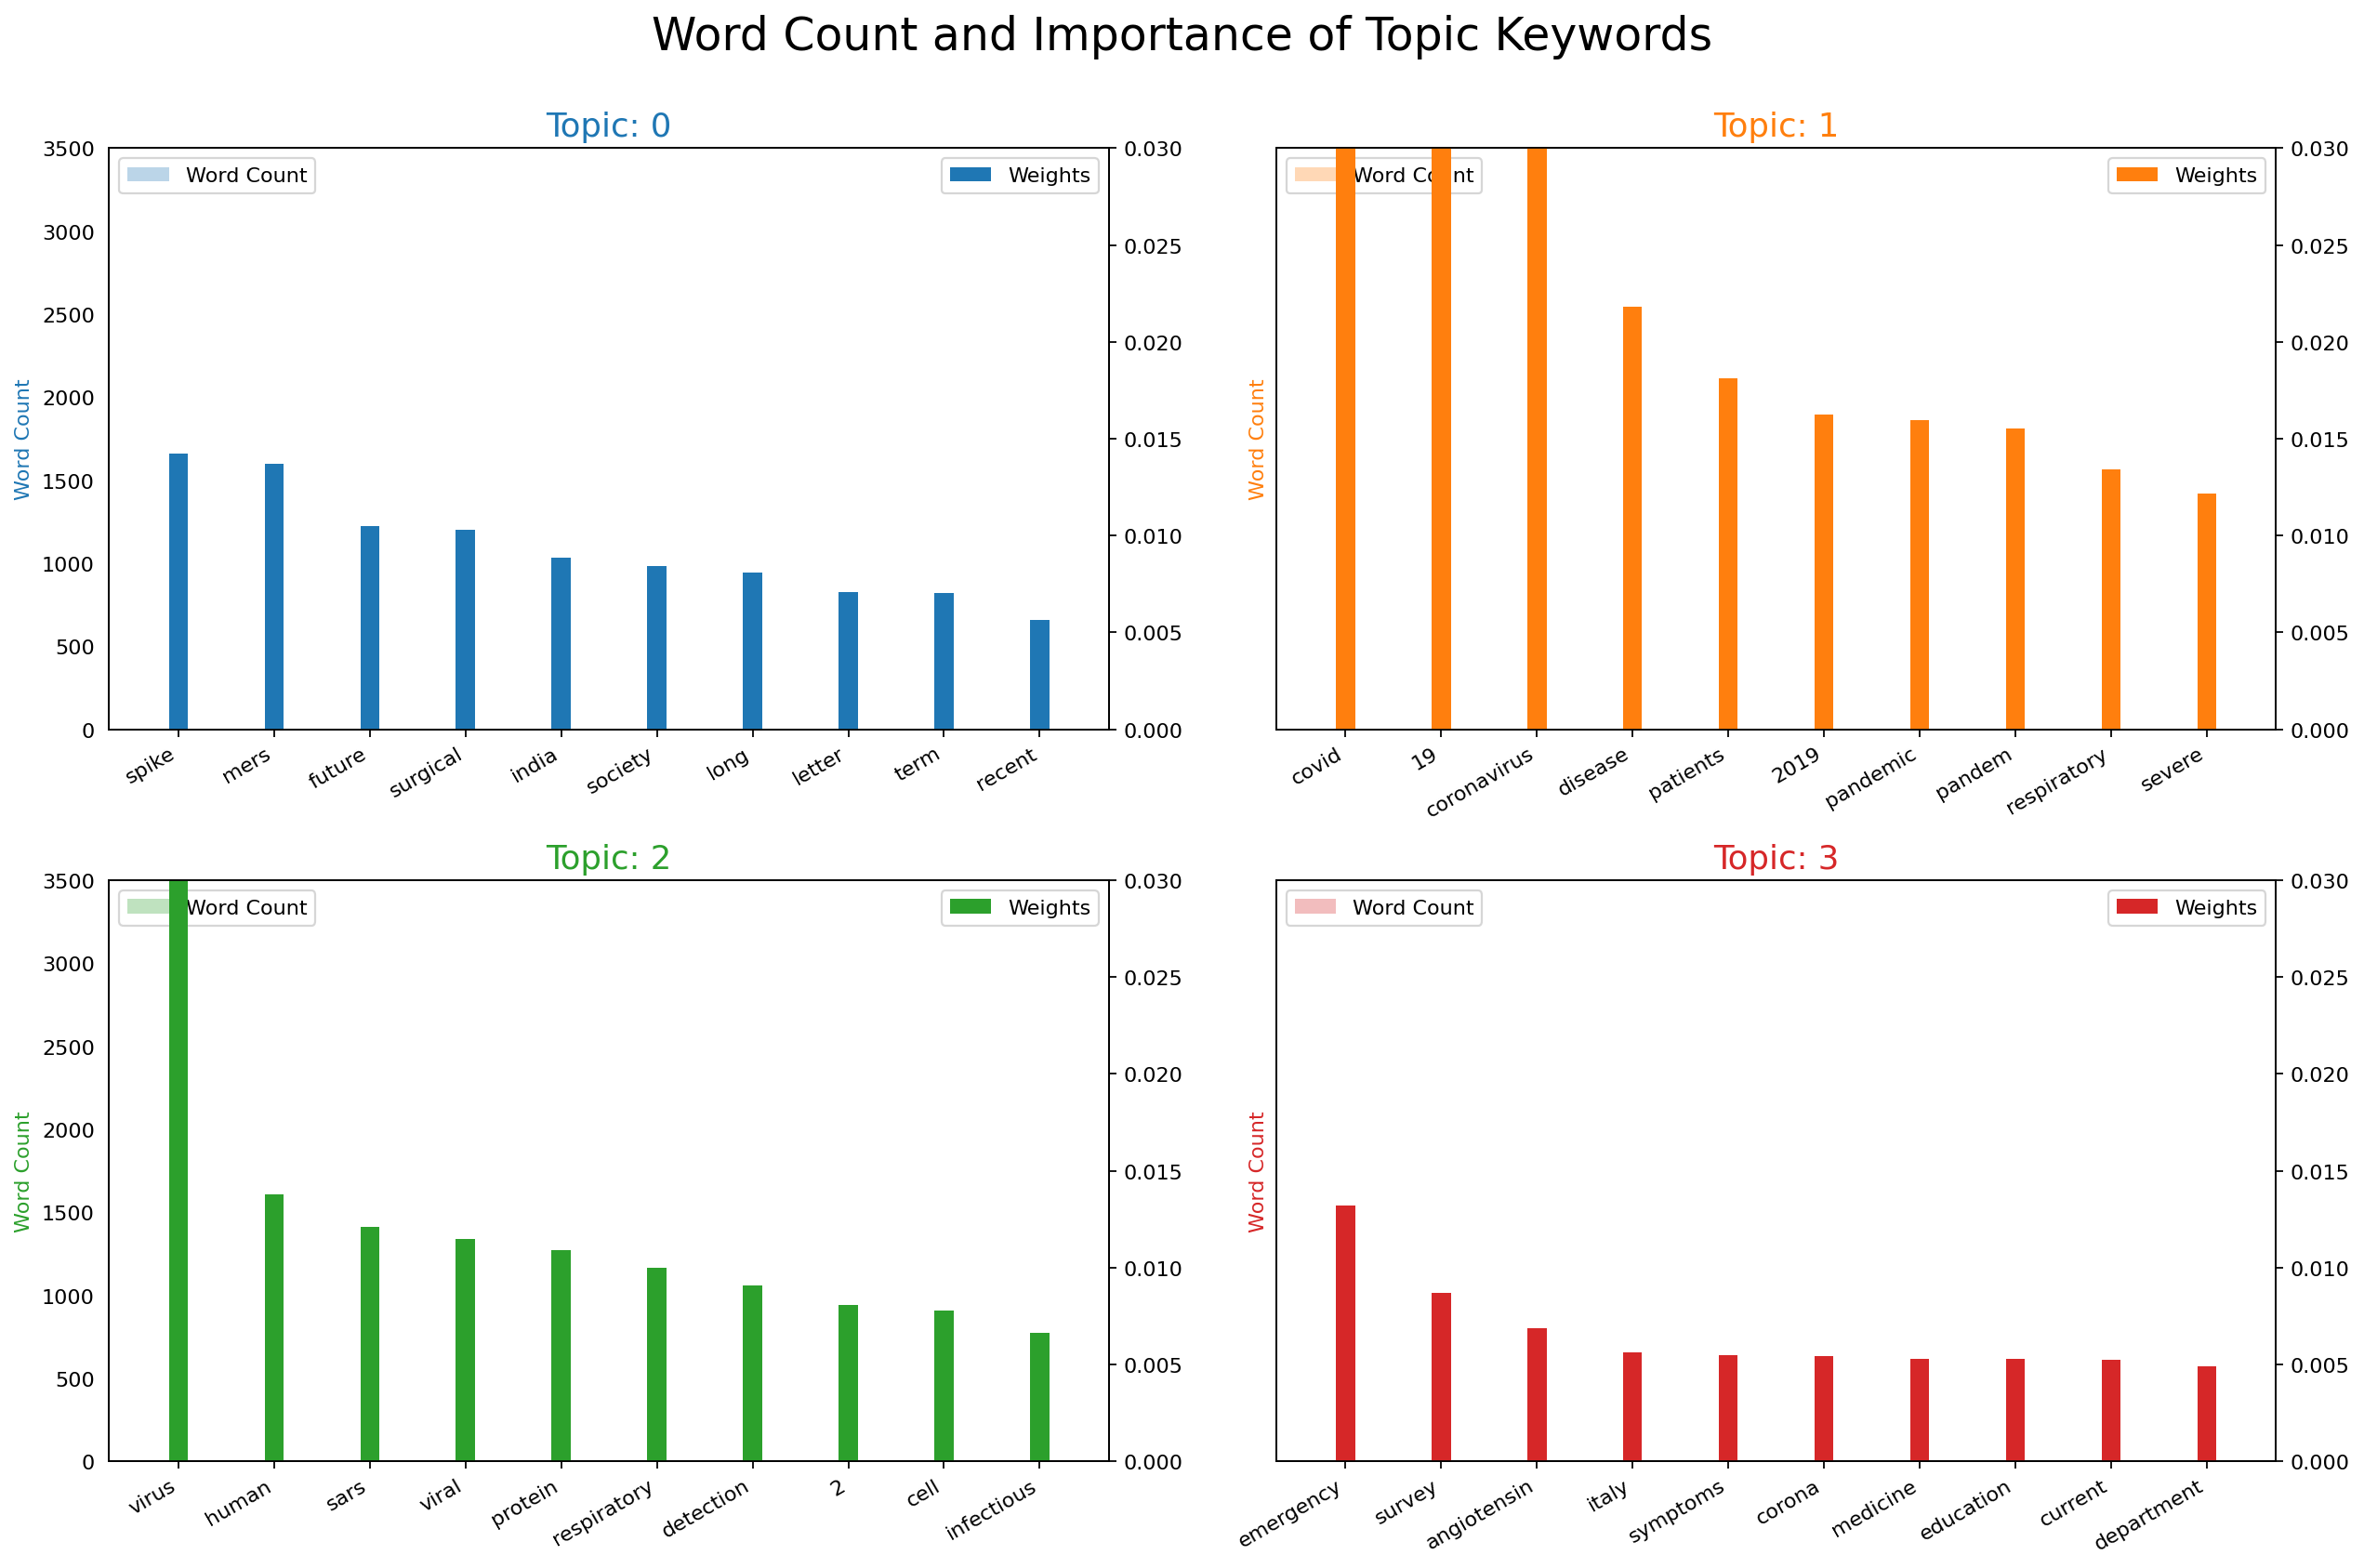

In [ ]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in corpus for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

Change in input size

Input size=800

In [ ]:
tit1 = tit[:800]
print(tit1)

[['clinical features culture-proven mycoplasma pneumoniae infections king abdulaziz university hospital jeddah saudi arabia'], ['nitric oxide pro-inflammatory mediator lung diseas'], ['surfactant protein-d pulmonary host defens'], ['role endothelin-1 lung diseas'], ['gene expression epithelial cells response pneumovirus infect'], ['sequence requirements strand transfer nidovirus discontinuous subgenomic synthesi'], ['debate transfusing normal haemoglobin levels improve outcom'], ['21st international symposium intensive care emergency medicine brussels belgium 20-23 march 2001'], ['heme oxygenase-1 carbon monoxide pulmonary medicin'], ['technical description rods real-time public health surveillance system'], ['conservation polyamine regulation translational frameshifting yeast mamm'], ['heterogeneous nuclear ribonucleoprotein regulates synthesis cytoplasmic virus'], ['method identify domain interacting protein'], ['vaccinia virus infection disrupts microtubule organization centrosome f

In [ ]:
val = []
for i in tit1:
  val.append(i[0])

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
doc_set = val
# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    texts.append(tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=100)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
print(val)
clo = " ".join(val)

['clinical features culture-proven mycoplasma pneumoniae infections king abdulaziz university hospital jeddah saudi arabia', 'nitric oxide pro-inflammatory mediator lung diseas', 'surfactant protein-d pulmonary host defens', 'role endothelin-1 lung diseas', 'gene expression epithelial cells response pneumovirus infect', 'sequence requirements strand transfer nidovirus discontinuous subgenomic synthesi', 'debate transfusing normal haemoglobin levels improve outcom', '21st international symposium intensive care emergency medicine brussels belgium 20-23 march 2001', 'heme oxygenase-1 carbon monoxide pulmonary medicin', 'technical description rods real-time public health surveillance system', 'conservation polyamine regulation translational frameshifting yeast mamm', 'heterogeneous nuclear ribonucleoprotein regulates synthesis cytoplasmic virus', 'method identify domain interacting protein', 'vaccinia virus infection disrupts microtubule organization centrosome funct', 'site origin 1918 in

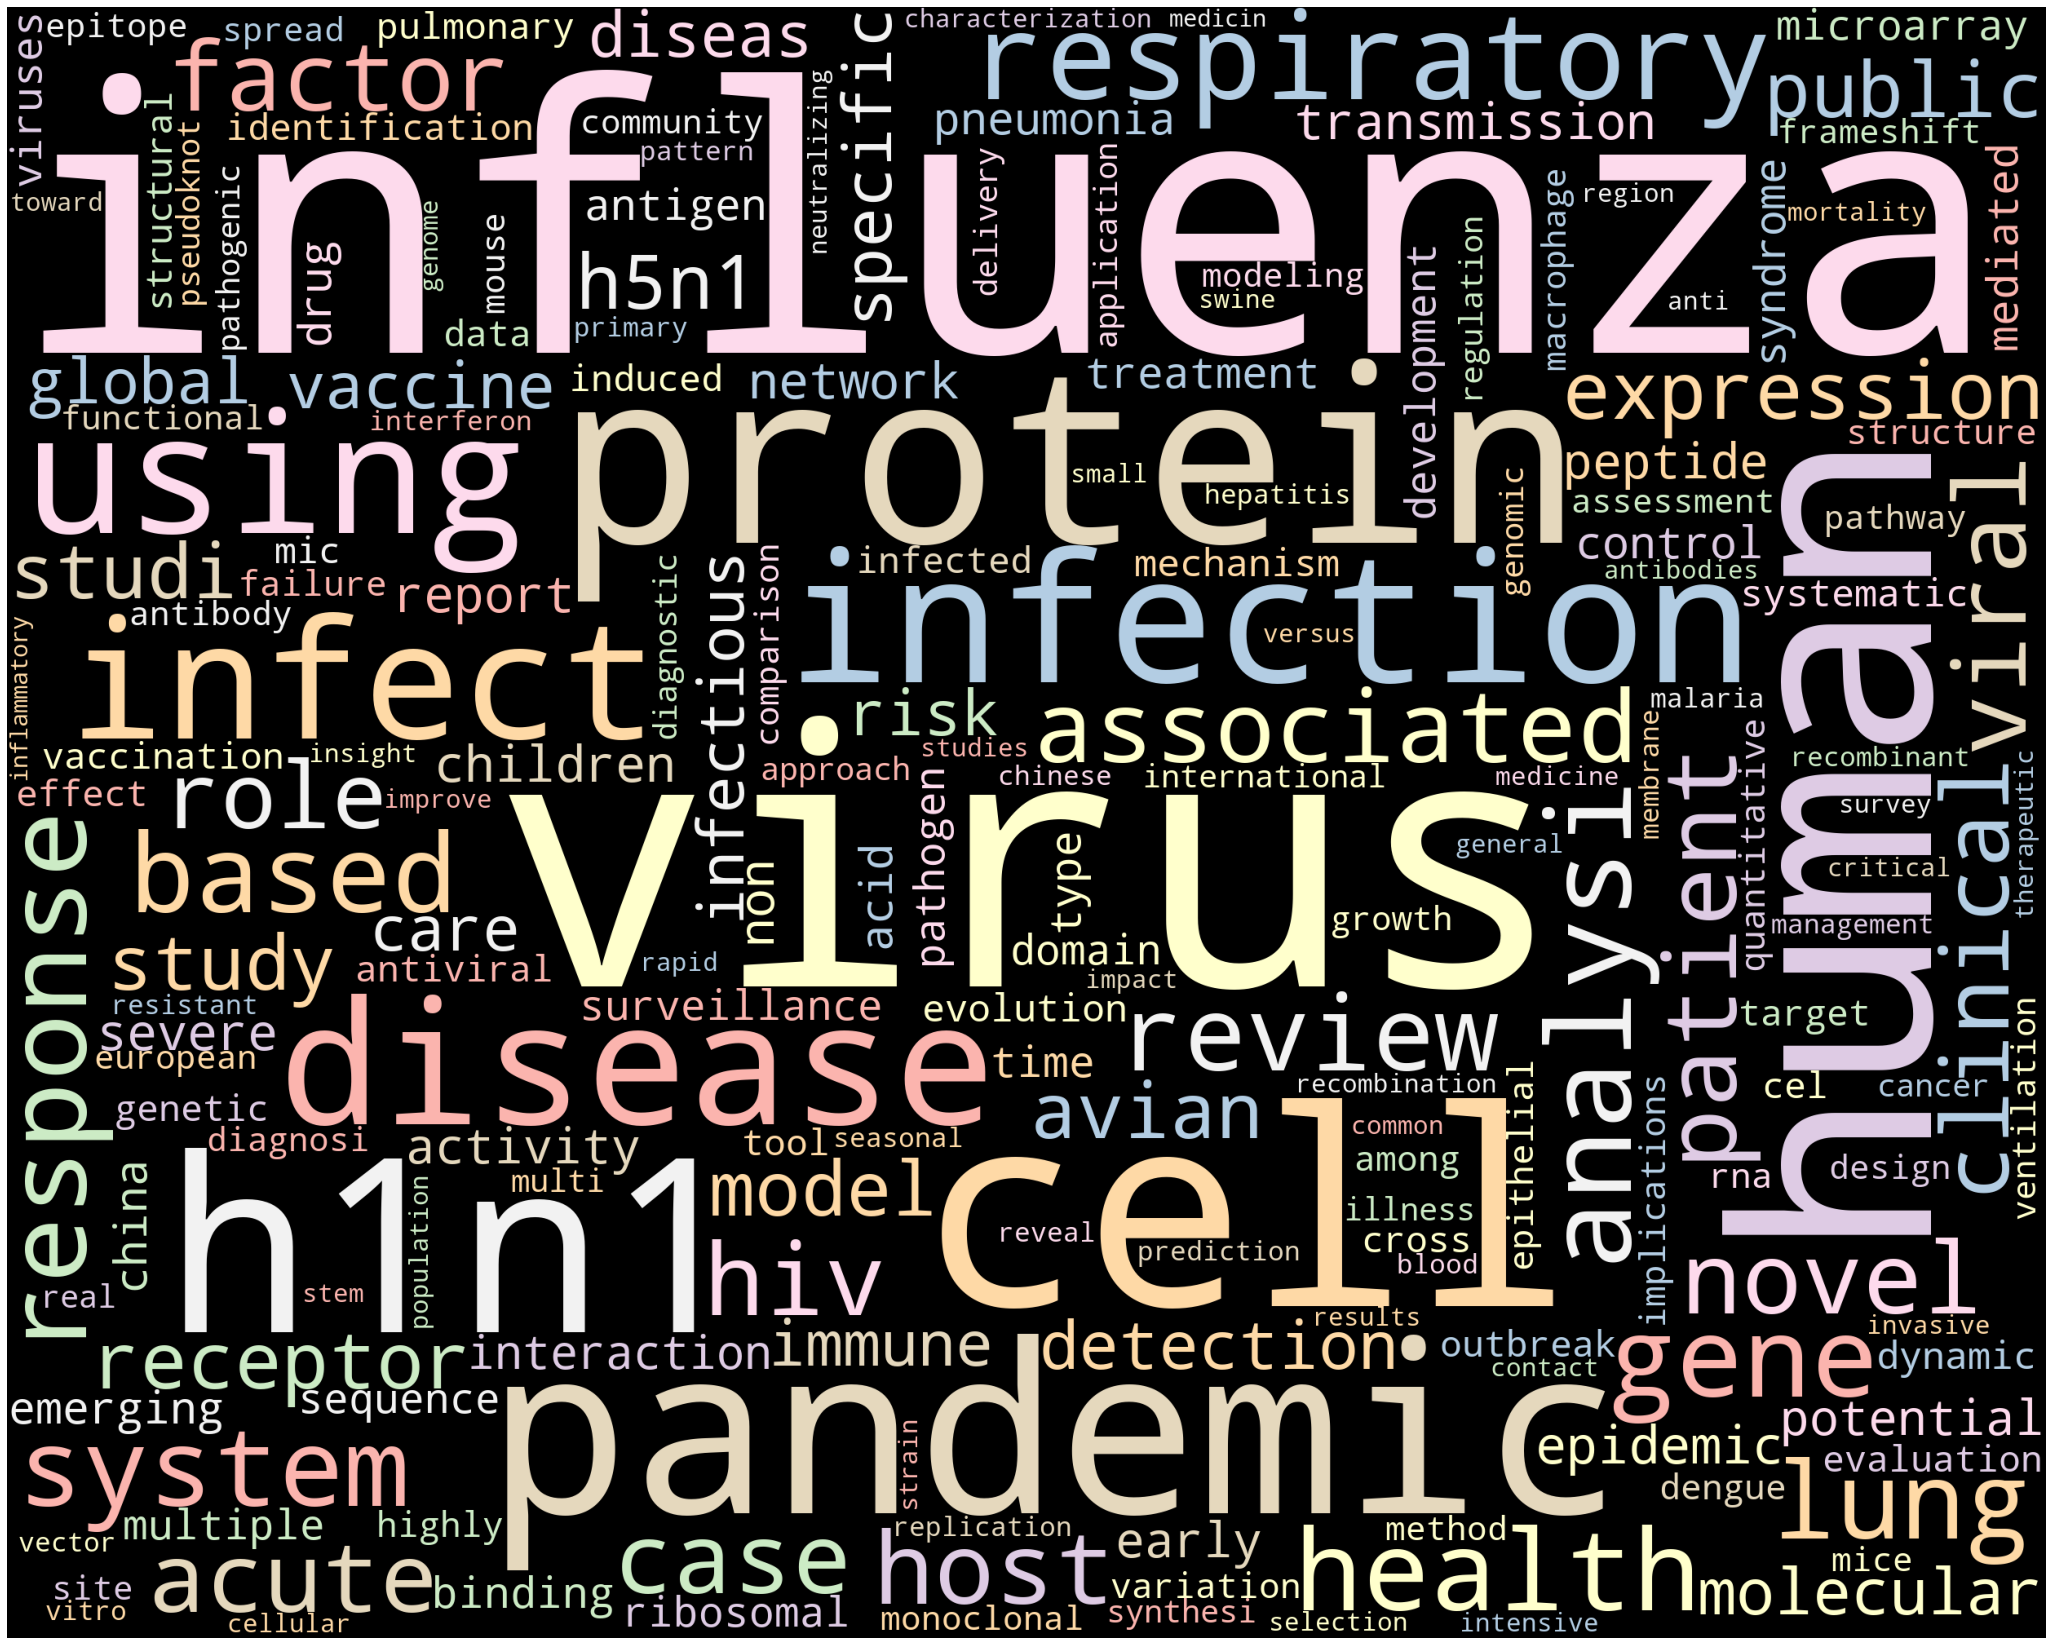

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 2500, height = 2000, random_state=5, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(clo)
# Plot
plot_cloud(wordcloud)

In [ ]:
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.008*"virus" + 0.007*"protein" + 0.006*"analysis" + 0.004*"using" + 0.004*"acid" + 0.004*"gene" + 0.004*"viral" + 0.004*"case" + 0.004*"hiv" + 0.004*"public"
Topic: 1 
Words: 0.008*"virus" + 0.007*"human" + 0.006*"based" + 0.006*"lung" + 0.006*"infect" + 0.006*"influenza" + 0.005*"receptor" + 0.004*"respiratory" + 0.004*"novel" + 0.004*"using"
Topic: 2 
Words: 0.007*"cell" + 0.006*"patients" + 0.005*"disease" + 0.005*"human" + 0.005*"respiratory" + 0.004*"cells" + 0.004*"virus" + 0.004*"infect" + 0.004*"emerging" + 0.004*"international"
Topic: 3 
Words: 0.033*"influenza" + 0.022*"virus" + 0.014*"pandemic" + 0.013*"h1n1" + 0.010*"human" + 0.009*"2009" + 0.007*"infection" + 0.006*"using" + 0.005*"avian" + 0.005*"1"


In [ ]:
import pandas as pd
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,6), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  ...                                               Text
0            0  ...  [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...
1            1  ...  [(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), ...
2            2  ...  [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1), ...
3            3  ...      [(14, 1), (16, 1), (27, 1), (28, 1), (29, 1)]
4            4  ...  [(30, 1), (31, 1), (32, 1), (33, 1), (34, 1), ...
5            5  ...  [(37, 1), (38, 1), (39, 1), (40, 1), (41, 1), ...
6            6  ...  [(45, 1), (46, 1), (47, 1), (48, 1), (49, 1), ...
7            7  ...  [(52, 1), (53, 1), (54, 1), (55, 1), (56, 1), ...
8            8  ...  [(25, 1), (27, 1), (65, 1), (66, 1), (67, 1), ...
9            9  ...  [(70, 1), (71, 1), (72, 1), (73, 1), (74, 1), ...

[10 rows x 5 columns]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


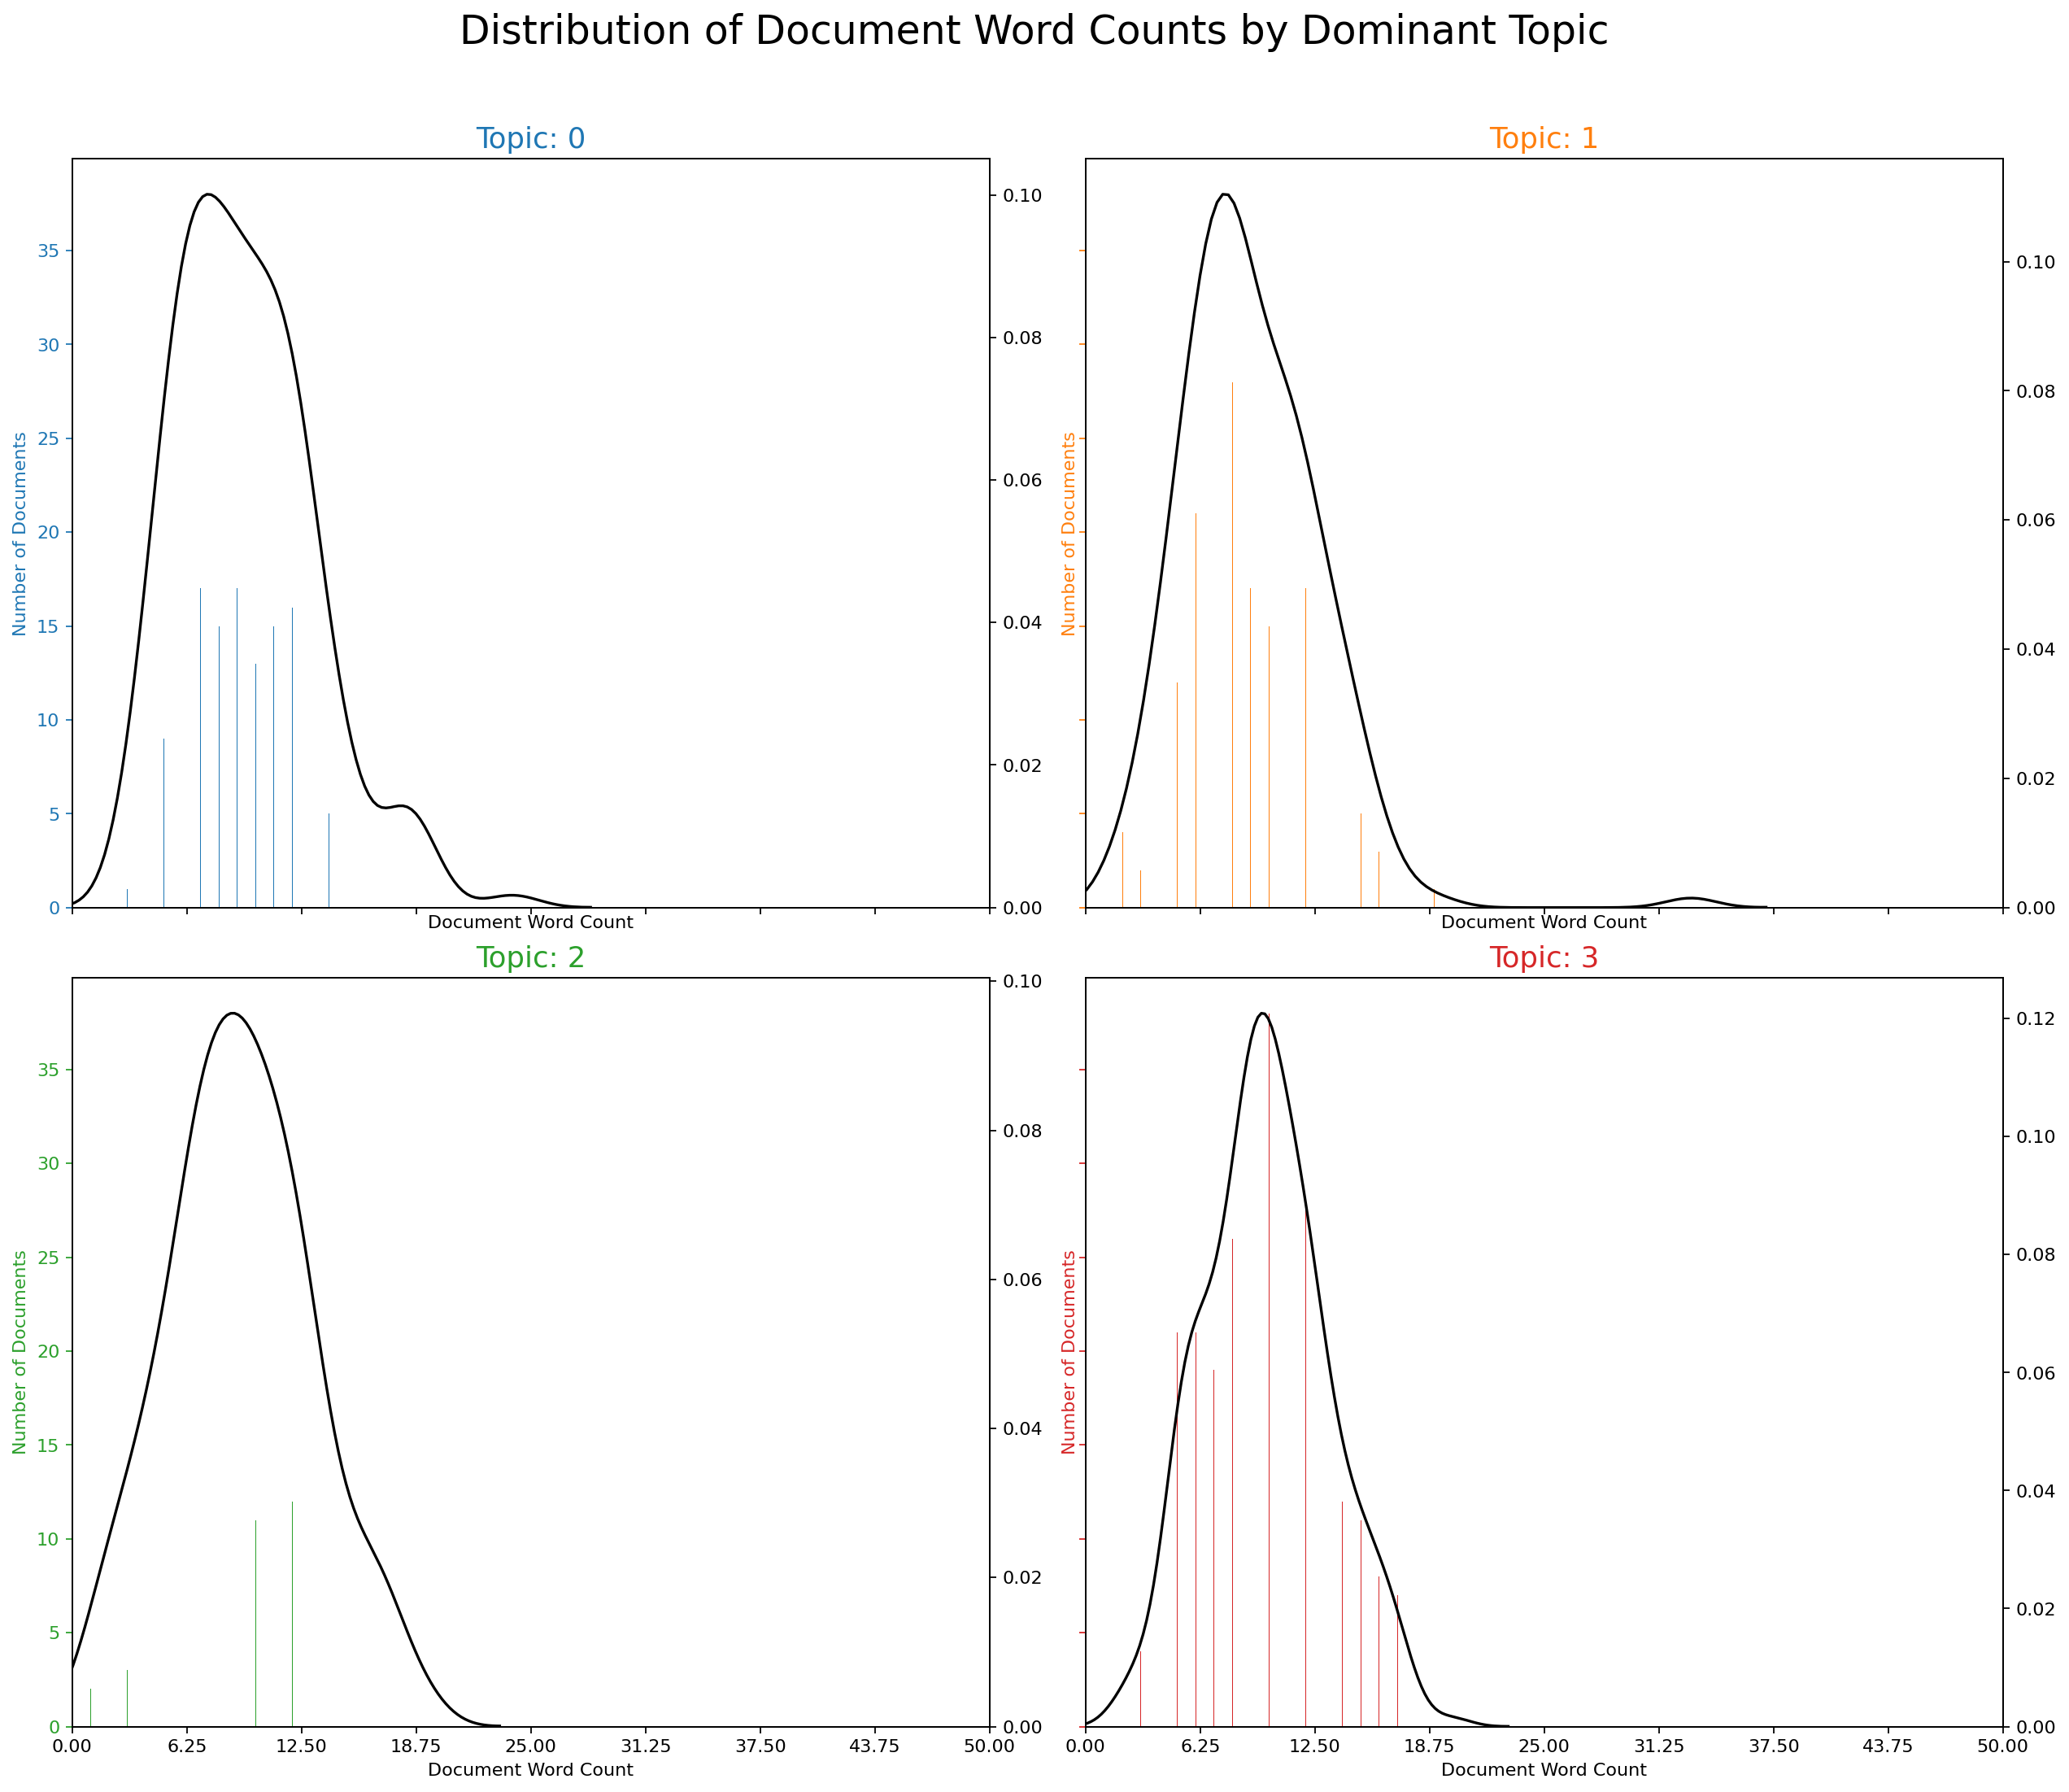

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 50), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,50,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

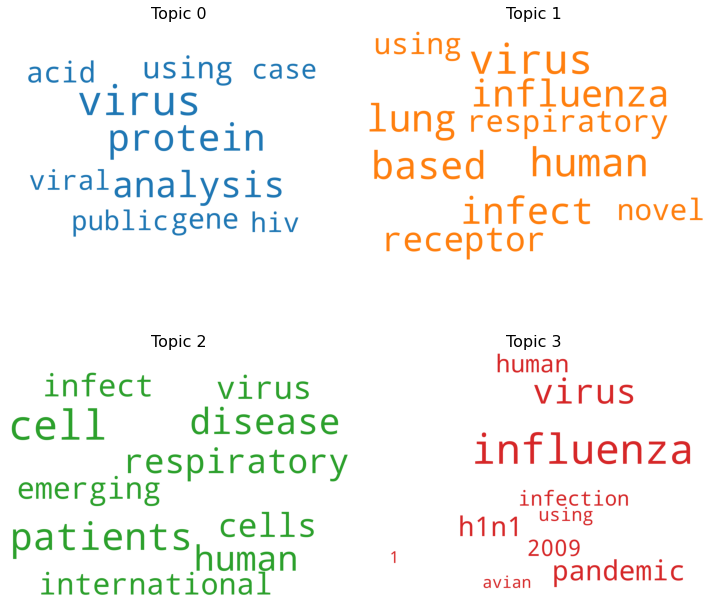

In [ ]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

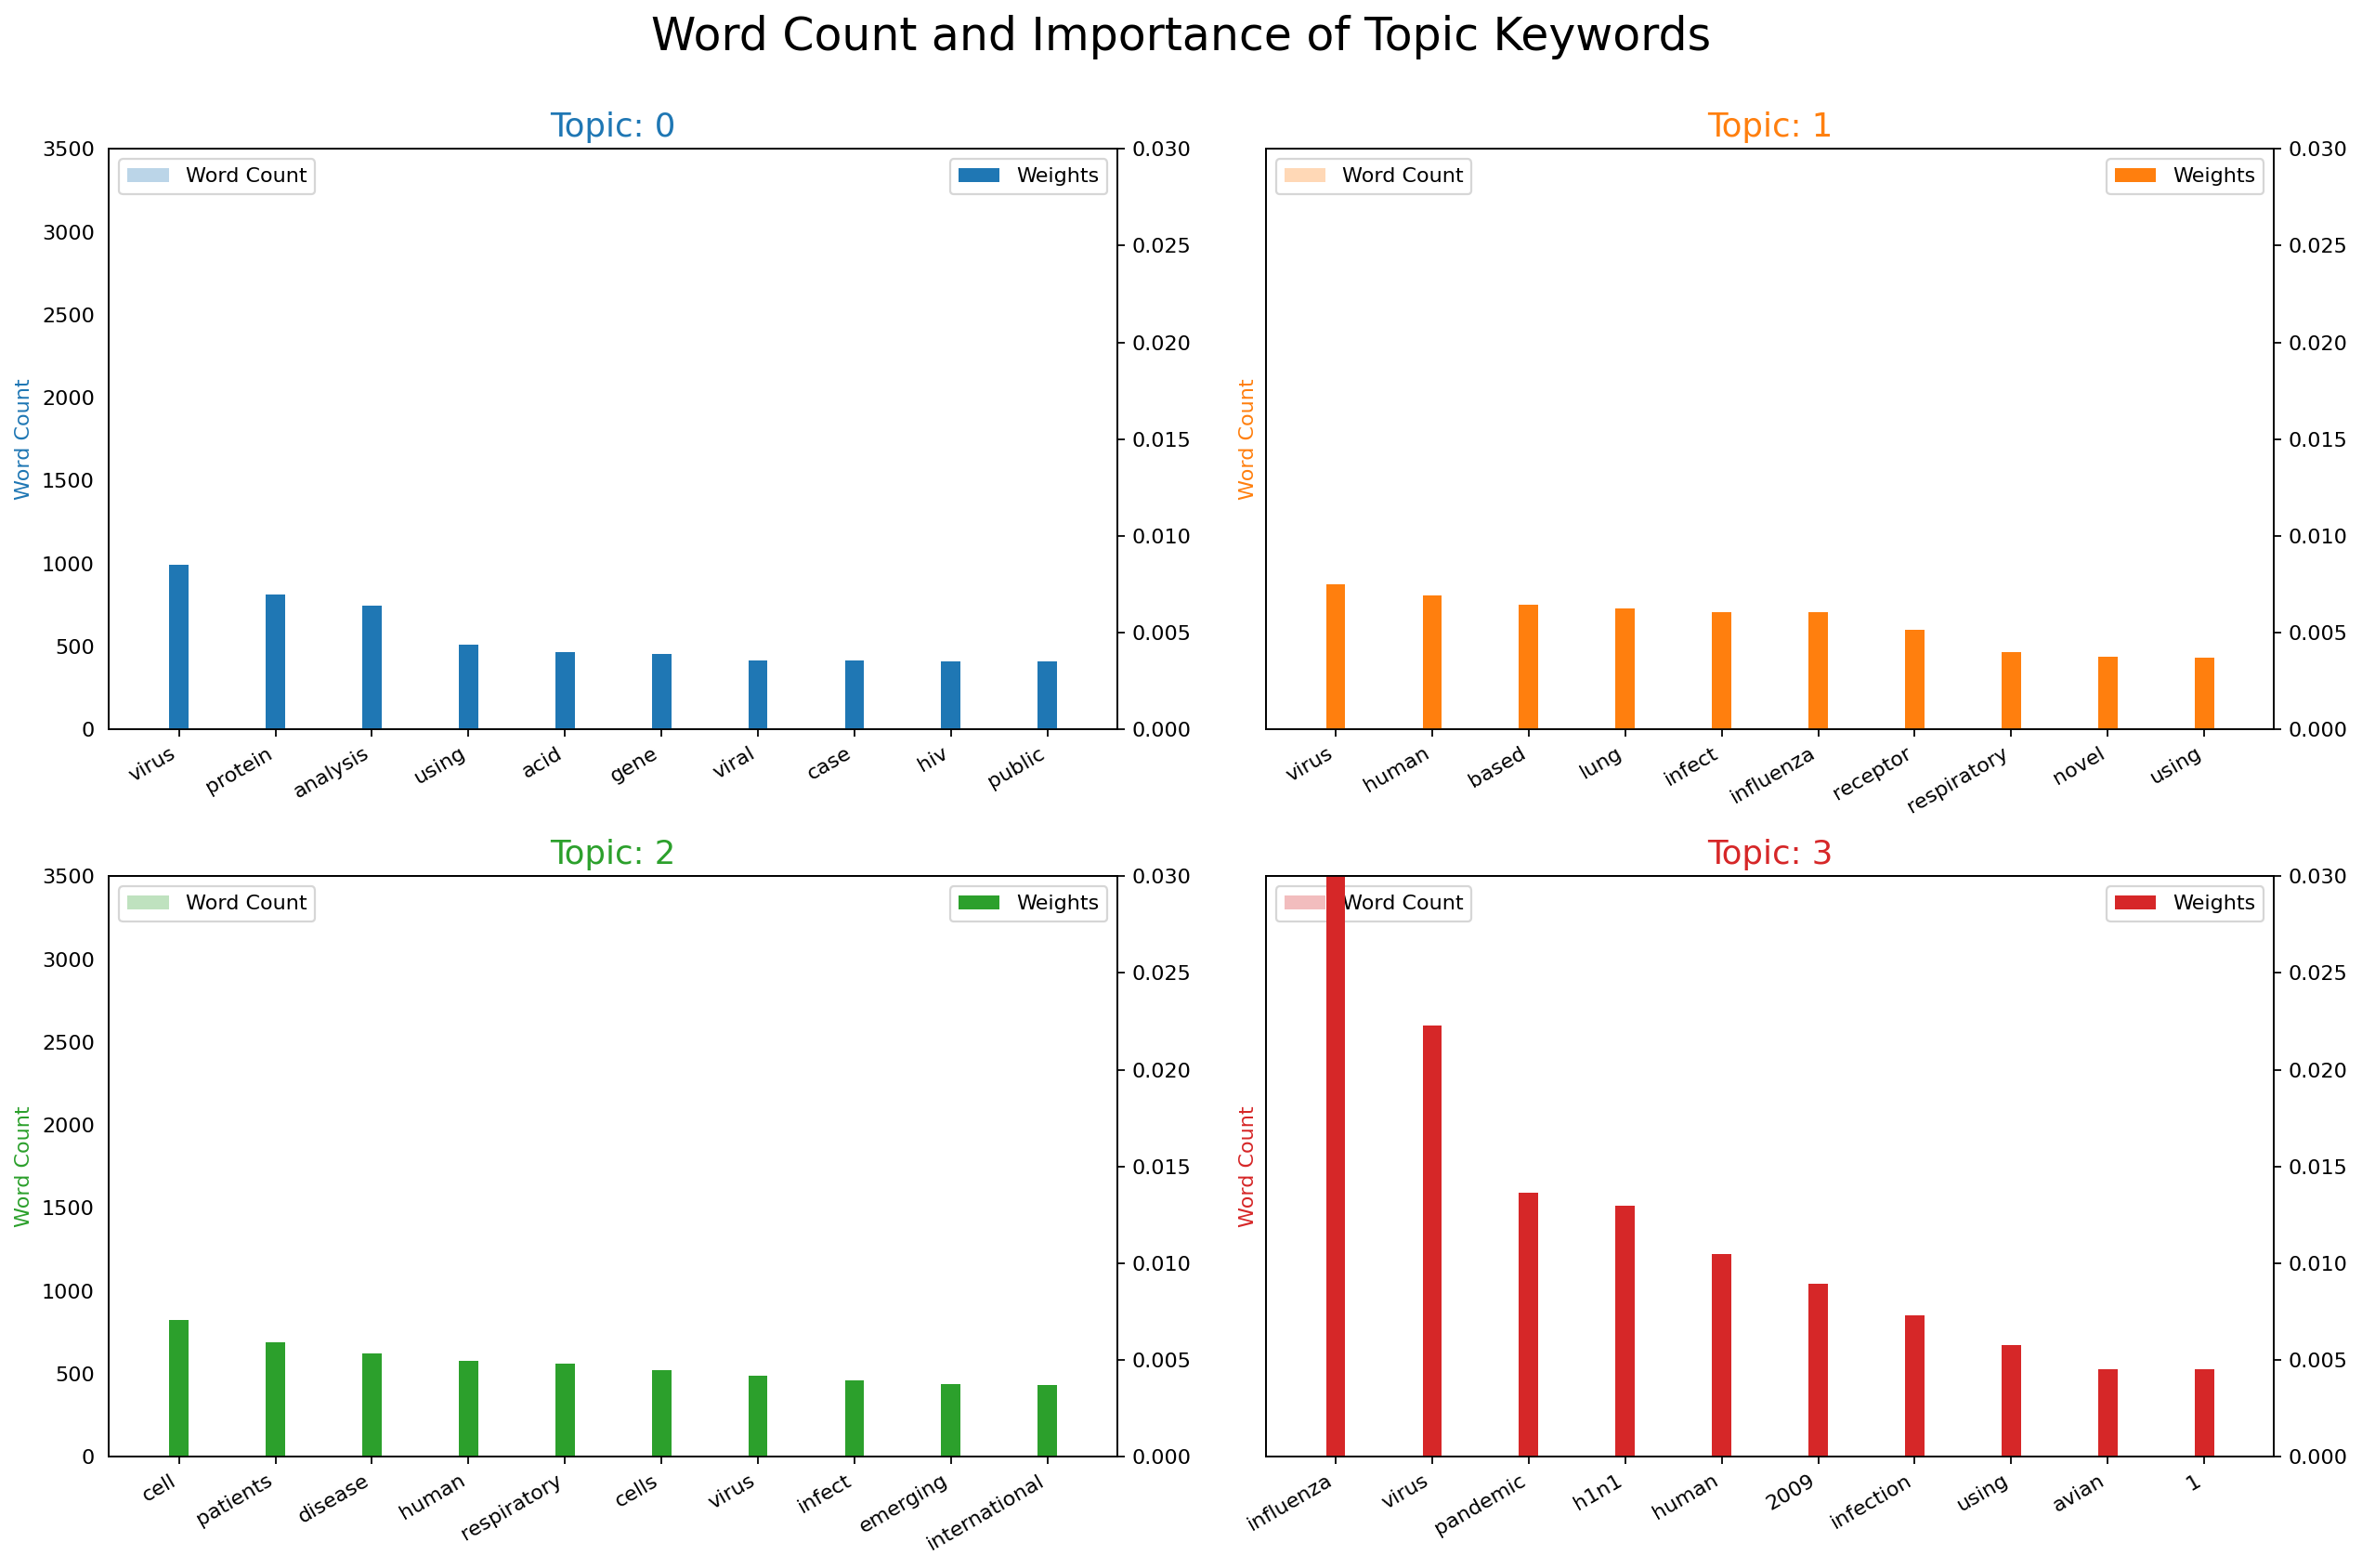

In [ ]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in corpus for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

Change in no. of topics

No. of topics = 11

In [ ]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=11, id2word = dictionary, passes=100)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
print(val)
clo = " ".join(val)

['clinical features culture-proven mycoplasma pneumoniae infections king abdulaziz university hospital jeddah saudi arabia', 'nitric oxide pro-inflammatory mediator lung diseas', 'surfactant protein-d pulmonary host defens', 'role endothelin-1 lung diseas', 'gene expression epithelial cells response pneumovirus infect', 'sequence requirements strand transfer nidovirus discontinuous subgenomic synthesi', 'debate transfusing normal haemoglobin levels improve outcom', '21st international symposium intensive care emergency medicine brussels belgium 20-23 march 2001', 'heme oxygenase-1 carbon monoxide pulmonary medicin', 'technical description rods real-time public health surveillance system', 'conservation polyamine regulation translational frameshifting yeast mamm', 'heterogeneous nuclear ribonucleoprotein regulates synthesis cytoplasmic virus', 'method identify domain interacting protein', 'vaccinia virus infection disrupts microtubule organization centrosome funct', 'site origin 1918 in

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 2500, height = 2000, random_state=5, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(clo)
# Plot
plot_cloud(wordcloud)

In [ ]:
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.022*"human" + 0.009*"cells" + 0.008*"specific" + 0.007*"cell" + 0.007*"gene" + 0.007*"using" + 0.006*"infect" + 0.005*"potential" + 0.005*"detection" + 0.005*"target"
Topic: 1 
Words: 0.011*"using" + 0.007*"novel" + 0.006*"host" + 0.006*"china" + 0.006*"protein" + 0.005*"viral" + 0.004*"based" + 0.004*"non" + 0.004*"receptor" + 0.004*"identification"
Topic: 2 
Words: 0.018*"virus" + 0.015*"influenza" + 0.008*"health" + 0.007*"pandemic" + 0.006*"detection" + 0.005*"expression" + 0.005*"system" + 0.005*"spread" + 0.005*"time" + 0.005*"disease"
Topic: 3 
Words: 0.064*"influenza" + 0.031*"h1n1" + 0.028*"pandemic" + 0.022*"virus" + 0.020*"2009" + 0.010*"avian" + 0.009*"clinical" + 0.009*"infection" + 0.007*"h5n1" + 0.007*"respiratory"
Topic: 4 
Words: 0.012*"virus" + 0.010*"human" + 0.008*"analysis" + 0.007*"associated" + 0.006*"influenza" + 0.006*"infections" + 0.006*"cell" + 0.005*"infected" + 0.005*"disease" + 0.005*"community"
Topic: 5 
Words: 0.012*"infect" + 0.011*"

In [ ]:
import pandas as pd
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,6), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  ...                                               Text
0            0  ...  [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1...
1            1  ...  [(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), ...
2            2  ...  [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1), ...
3            3  ...      [(14, 1), (16, 1), (27, 1), (28, 1), (29, 1)]
4            4  ...  [(30, 1), (31, 1), (32, 1), (33, 1), (34, 1), ...
5            5  ...  [(37, 1), (38, 1), (39, 1), (40, 1), (41, 1), ...
6            6  ...  [(45, 1), (46, 1), (47, 1), (48, 1), (49, 1), ...
7            7  ...  [(52, 1), (53, 1), (54, 1), (55, 1), (56, 1), ...
8            8  ...  [(25, 1), (27, 1), (65, 1), (66, 1), (67, 1), ...
9            9  ...  [(70, 1), (71, 1), (72, 1), (73, 1), (74, 1), ...

[10 rows x 5 columns]

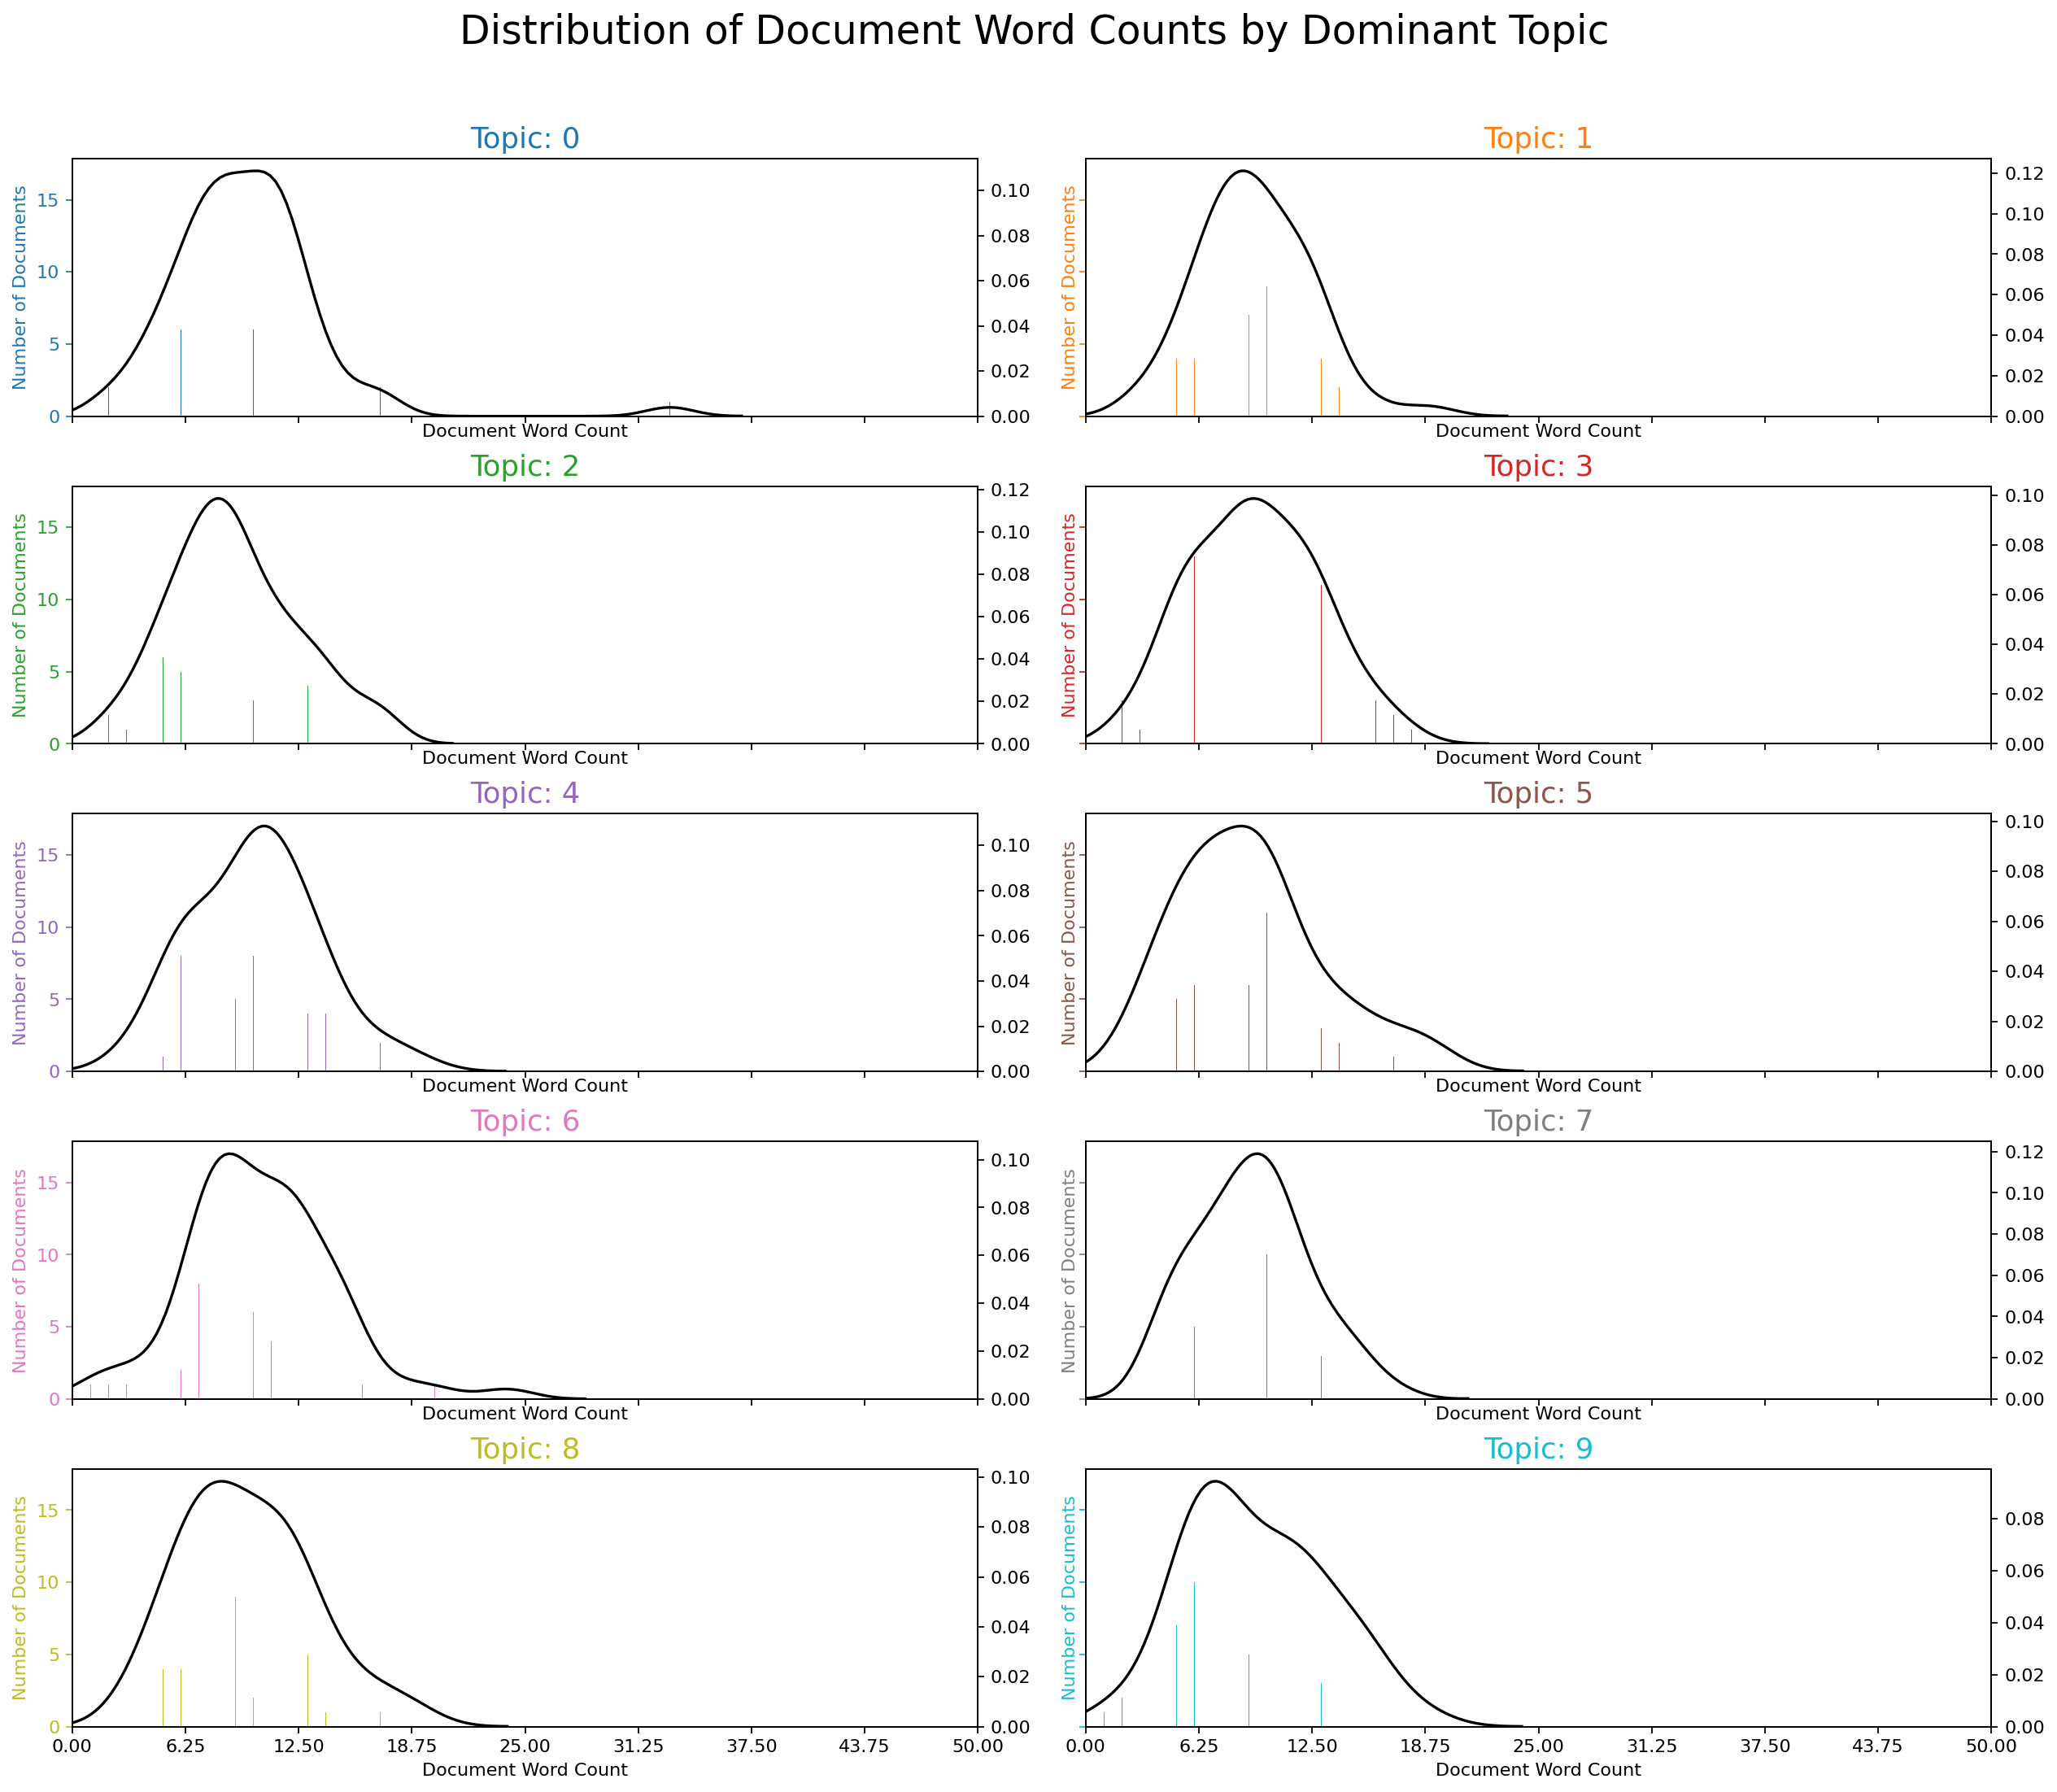

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(5,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 50), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,50,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

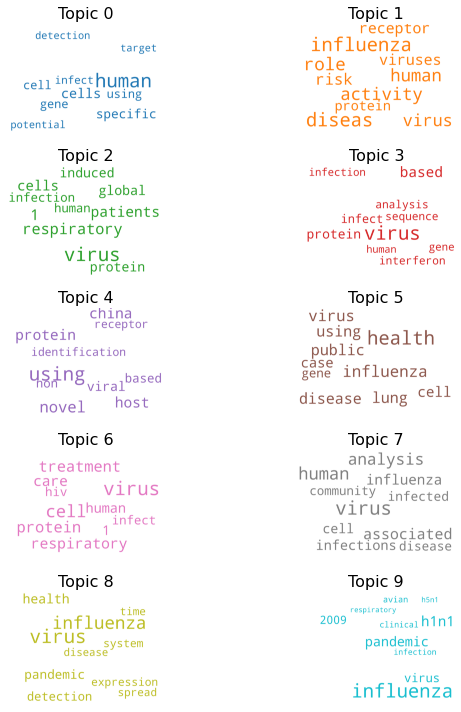

In [ ]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

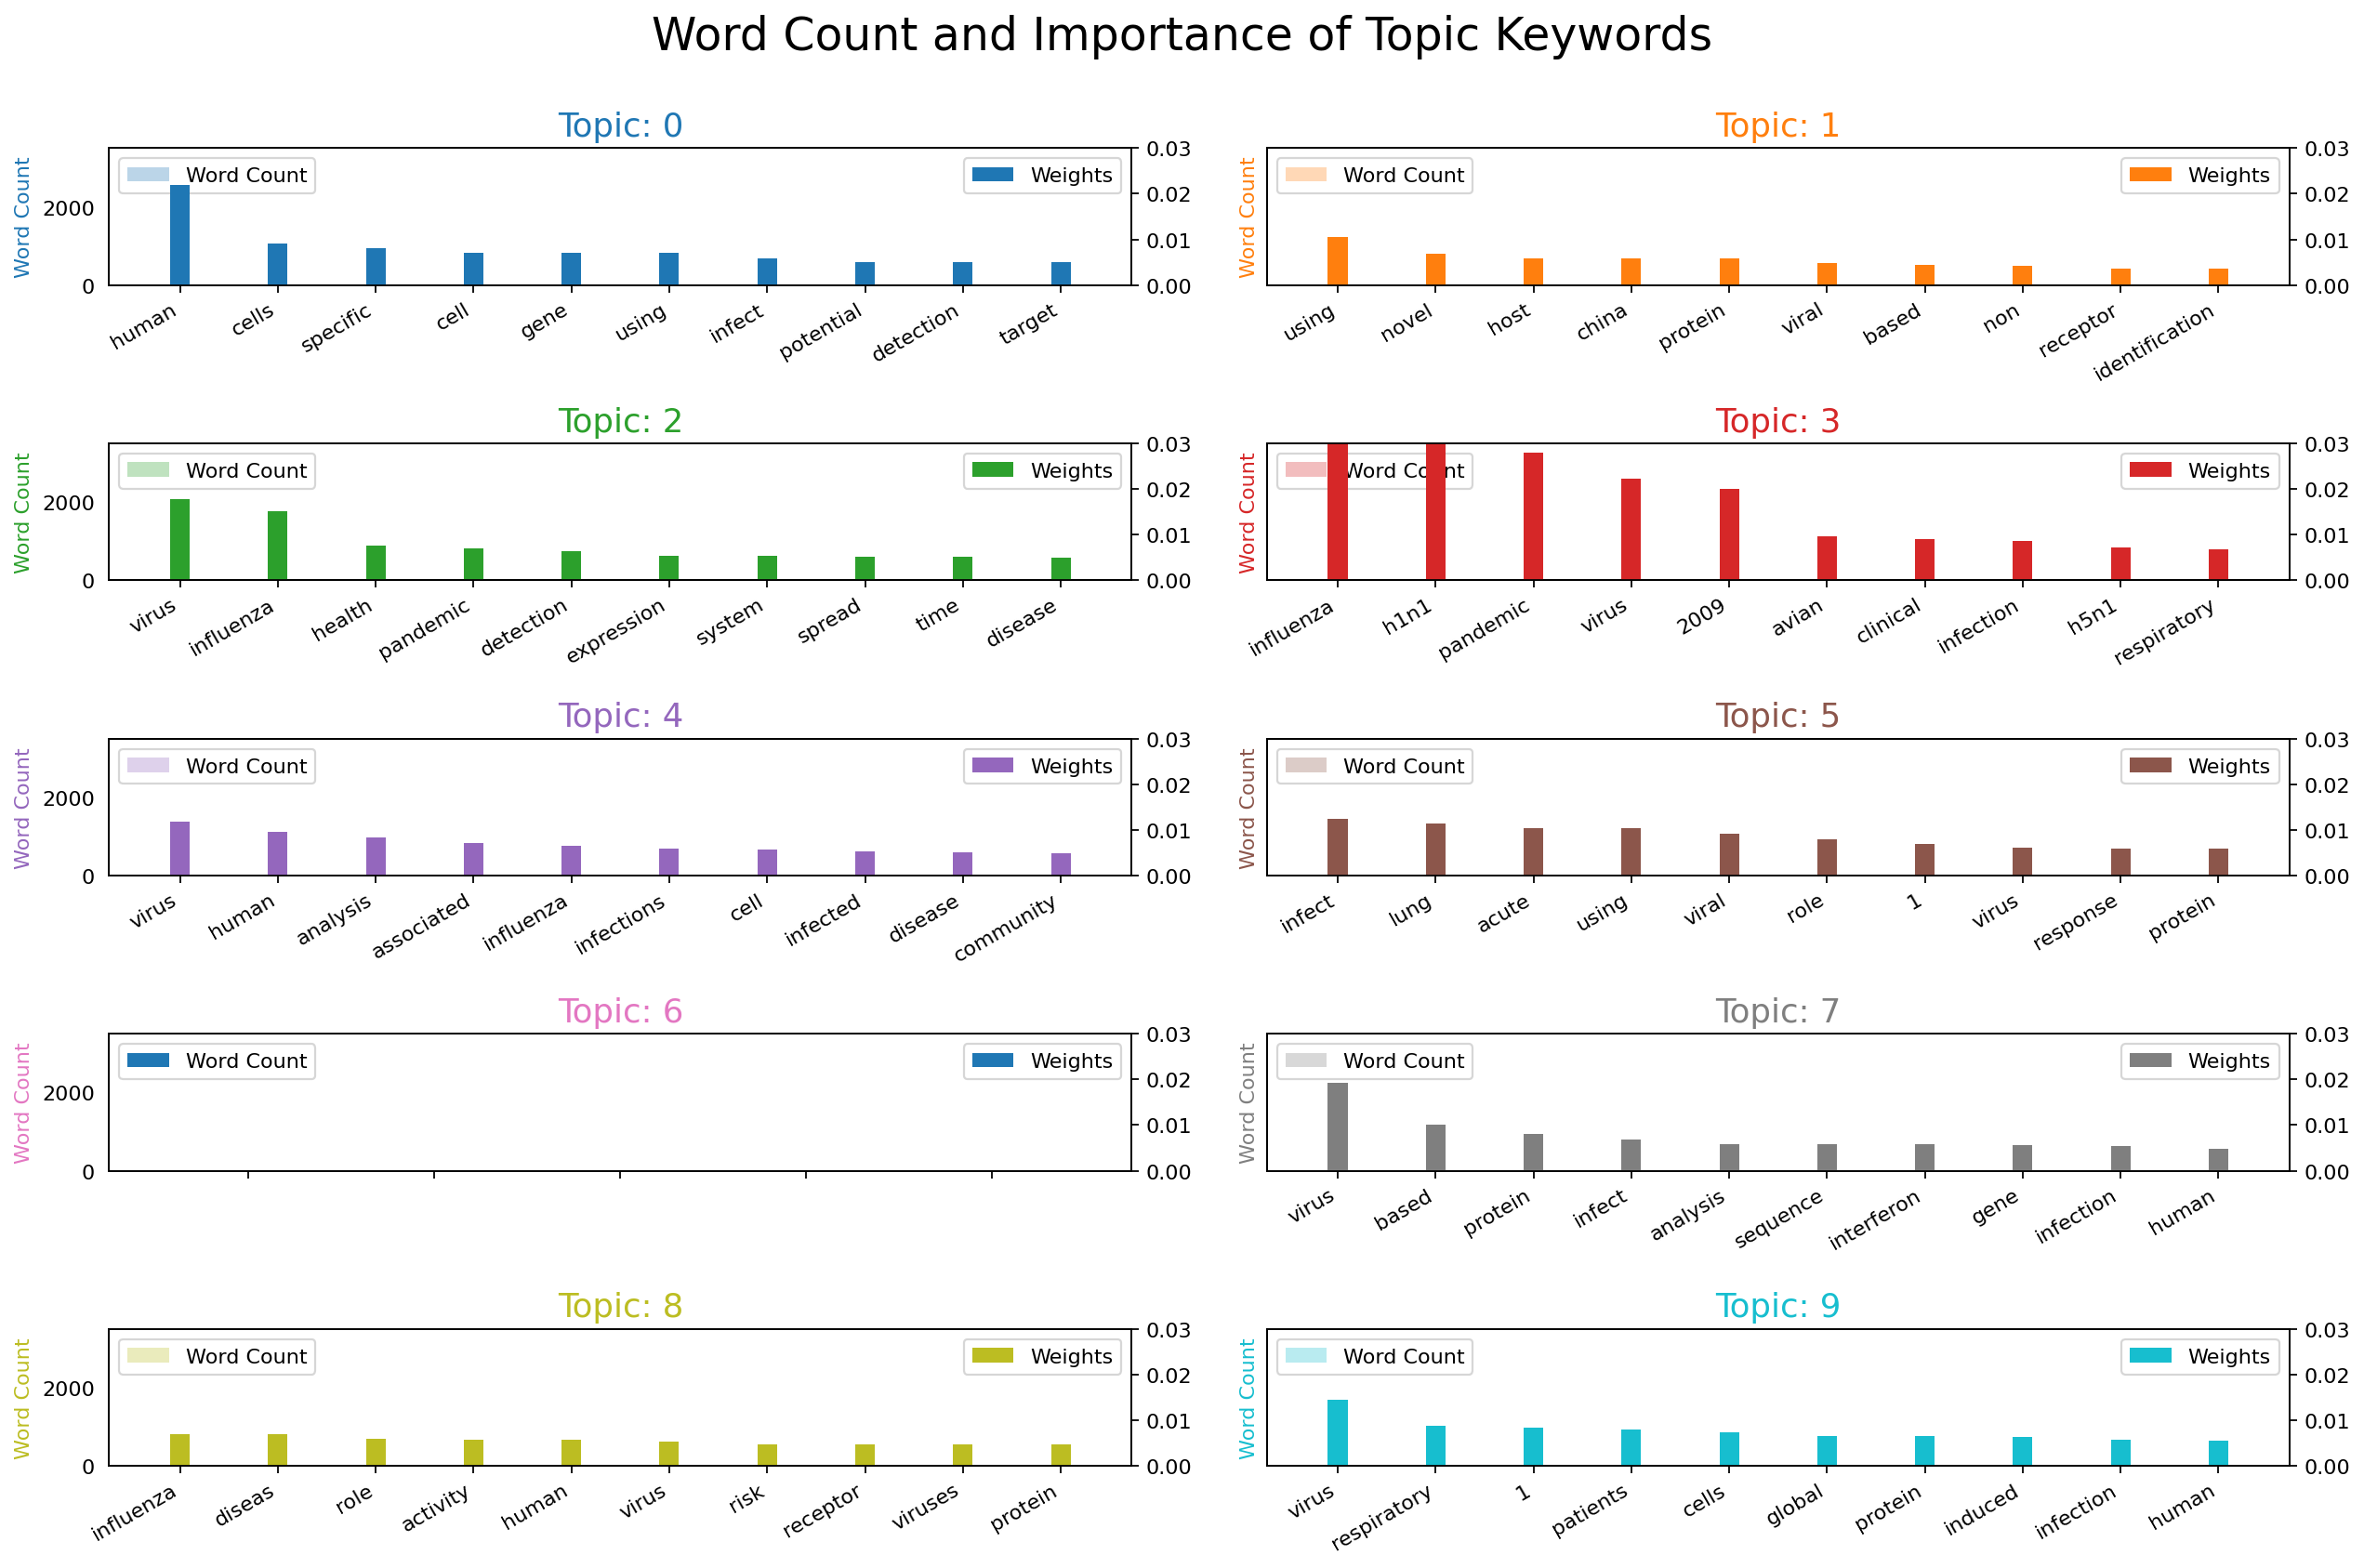

In [ ]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in corpus for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

#LSA model

**Importing libraries**

In [ ]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join('COVID-19_title.csv') ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

**Pre processing Data**

In [ ]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

**Prepare Corpus**

In [ ]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

**LSA**

In [ ]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

**Determine no. of topics**

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

**Coherence**

In [ ]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [ ]:
start,stop,step=2,12,1
plot_graph(dictionary,start,stop,step)

NameError: ignored

No. of topics = 7

In [ ]:
# LSA Model
number_of_topics=8
words=10
document_list,titles=load_data("","articles.txt")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 242108
[(0, '0.680*"covid" + 0.672*"19" + 0.150*"pandem" + 0.104*"patient" + 0.060*"diseas" + 0.059*"coronaviru" + 0.049*"infect" + 0.046*"health" + 0.044*"sar" + 0.040*"cov"'), (1, '0.550*"sar" + 0.516*"cov" + 0.494*"2" + 0.226*"infect" + 0.168*"coronaviru" + 0.105*"respiratori" + -0.100*"covid" + -0.098*"19" + 0.076*"patient" + 0.071*"syndrom"'), (2, '0.606*"coronaviru" + 0.379*"diseas" + 0.293*"2019" + 0.241*"respiratori" + -0.210*"cov" + -0.202*"2" + -0.193*"sar" + 0.157*"syndrom" + 0.157*"patient" + 0.156*"acut"'), (3, '0.465*"infect" + 0.352*"respiratori" + -0.326*"coronaviru" + -0.320*"diseas" + -0.252*"2019" + -0.252*"pandem" + 0.244*"viru" + 0.236*"patient" + 0.220*"acut" + 0.175*"syndrom"'), (4, '-0.726*"patient" + 0.388*"viru" + 0.270*"infect" + 0.223*"pandem" + -0.147*"studi" + -0.120*"clinic" + 0.114*"coronaviru" + -0.099*"diseas" + 0.089*"protein" + 0.078*"human"'), (5, '0.683*"pandem" + 0.280*"viru" + 0.263*"patient" + 0.246*"health" + -0.238*"

No. of topics = 6

In [ ]:
# LSA Model
number_of_topics=6
words=10
document_list,titles=load_data("","articles.txt")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 242108
[(0, '0.680*"covid" + 0.672*"19" + 0.150*"pandem" + 0.104*"patient" + 0.060*"diseas" + 0.059*"coronaviru" + 0.049*"infect" + 0.046*"health" + 0.044*"sar" + 0.040*"cov"'), (1, '0.550*"sar" + 0.516*"cov" + 0.494*"2" + 0.238*"infect" + 0.157*"coronaviru" + 0.106*"respiratori" + -0.099*"covid" + -0.097*"19" + 0.080*"patient" + 0.070*"viru"'), (2, '0.580*"coronaviru" + 0.354*"diseas" + 0.277*"2019" + 0.265*"respiratori" + -0.213*"cov" + -0.206*"2" + -0.198*"sar" + 0.186*"infect" + 0.169*"acut" + 0.167*"syndrom"'), (3, '0.417*"patient" + -0.372*"coronaviru" + 0.351*"infect" + 0.307*"respiratori" + -0.303*"pandem" + -0.287*"diseas" + -0.252*"2019" + 0.199*"acut" + 0.152*"syndrom" + 0.146*"sever"'), (4, '0.643*"viru" + -0.509*"patient" + 0.226*"infect" + 0.207*"pandem" + -0.147*"diseas" + -0.128*"2019" + 0.116*"influenza" + 0.115*"respiratori" + 0.108*"protein" + 0.102*"cell"'), (5, '-0.442*"pandem" + -0.344*"patient" + -0.263*"review" + 0.207*"respiratori" + 

#Hyper Parameter Tuning

**For first 800 set of data**

In [ ]:
val = val[0:800]

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
doc_set = val
# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    texts.append(tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]


In [ ]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=8, id2word = dictionary, passes=100, random_state=100, chunksize=100, per_word_topics=True)

In [ ]:
for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.023*"using" + 0.021*"protein" + 0.015*"receptor" + 0.014*"detection" + 0.008*"data" + 0.008*"genetic" + 0.008*"sequence" + 0.007*"analysis" + 0.007*"target" + 0.006*"characterization"
Topic: 1 
Words: 0.029*"human" + 0.027*"cell" + 0.026*"virus" + 0.017*"novel" + 0.012*"avian" + 0.012*"influenza" + 0.012*"host" + 0.011*"protein" + 0.009*"binding" + 0.008*"structural"
Topic: 2 
Words: 0.015*"based" + 0.015*"risk" + 0.014*"severe" + 0.013*"infectious" + 0.012*"immune" + 0.012*"treatment" + 0.011*"system" + 0.011*"syndrome" + 0.010*"time" + 0.010*"viruses"
Topic: 3 
Words: 0.022*"disease" + 0.020*"respiratory" + 0.018*"lung" + 0.018*"1" + 0.017*"acute" + 0.017*"hiv" + 0.011*"a" + 0.011*"children" + 0.011*"epidemic" + 0.011*"diseas"
Topic: 4 
Words: 0.030*"infect" + 0.024*"cells" + 0.018*"clinical" + 0.018*"response" + 0.017*"viral" + 0.016*"gene" + 0.013*"global" + 0.012*"pneumonia" + 0.011*"control" + 0.011*"infections"
Topic: 5 
Words: 0.017*"analysis" + 0.017*"studi"

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=corpus, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.6/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:193: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
/usr/local/lib/python3.6/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:194: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
/usr/local/lib/python3.6/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:189: RuntimeWarning: invalid value encountered in true_divide
  co_doc_prob = co_occur_count / num_docs



Coherence Score:  nan


In [ ]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus,
                                           id2word=dictionary,
                                           num_topics=8, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=100,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=corpus, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import pandas as pd
import os
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

  0%|          | 0/540 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)
/usr/local/lib/python3.6/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:193: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
/usr/local/lib/python3.6/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:194: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
/usr/local/lib/python3.6/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:189: RuntimeWarning: invalid value encountered in true_divide
  co_doc_prob = co_occur_count / num_docs
100%|██████████| 540/540 [3:53:43<00:00, 25.97s/it]


In [ ]:
!python -m pip install -U pyLDAvis

     |████████████████████████████████| 1.6MB 1.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=e76b86227948c22b7f6ed31b1e86ce2043135b5d2b8f3ecacf97003d6829adc1
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.237866  0.001480       1        1  15.558284
1     -0.004055 -0.194758       2        1  14.915065
3     -0.038959  0.202641       3        1  14.113028
7      0.105875 -0.003318       4        1  11.484744
2     -0.015681  0.061361       5        1  11.337677
0     -0.113259 -0.076490       6        1  11.171260
4     -0.083095  0.037333       7        1  10.717517
5     -0.088692 -0.028249       8        1  10.702426, topic_info=           Term        Freq       Total Category  logprob  loglift
106   influenza  102.000000  102.000000  Default  30.0000  30.0000
1313       h1n1   44.000000   44.000000  Default  29.0000  29.0000
355        cell   31.000000   31.000000  Default  28.0000  28.0000
1312       2009   26.000000   26.000000  Default  27.0000  27.0000
188       human   48.000000   48.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
27            1    8.049987   27.534458   Topic8  -4.6251   1.0049
818       cross    4.730302    8.785401   Topic8  -5.1568   1.6156
33         gene    5.639953   19.267382   Topic8  -4.9809   1.0062
1337   mediated    4.454542   10.657695   Topic8  -5.2168   1.3623
92        virus    3.589413   94.969577   Topic8  -5.4328  -1.0409

[347 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
27        3  0.690044         1
27        8  0.290545         1
268       1  0.889239         2
1312      4  0.976683      2009
715       8  0.748494         3
...     ...       ...       ...
349       8  0.853345   workers
429       6  0.955037      year
85        4  0.810357     yeast
676       3  0.808534  zoonotic
475       5  0.895195         α

[349 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 4, 8, 3, 1, 5, 6])